# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'
datadirectory = gitdir + '/' + 'Data/'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [6]:
import sys
sys.path.insert(0, '..')
import Scoreboard19 as S19
from tqdm import tqdm
import re
import scipy.interpolate
import pandas as pd
from pathlib import Path
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob
S19.figures_dir = Path('../Figures').resolve()
S19.data_dir = Path('../Data').resolve()

# READ FORECASTS FROM COVID HUB

In [7]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [8]:
rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [9]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [10]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14 (delta 10), reused 12 (delta 10), pack-reused 1
Unpacking objects: 100% (14/14), 1.27 MiB | 5.19 MiB/s, done.
From https://github.com/reichlab/covid19-forecast-hub
   e4a9fe27..1fab3f67  master     -> origin/master
Updating e4a9fe27..1fab3f67
Fast-forward
 code/validation/locally_validated_files.csv       |      1 +
 code/validation/validated_files.csv               |      1 +
 code/zoltar_scripts/validated_file_db.json        |      3 +-
 data-processed/FAIR-NRAR/2020-12-18-FAIR-NRAR.csv | 100417 +++++++++++++++++++
 4 files changed, 100421 insertions(+), 1 deletion(-)
 create mode 100644 data-processed/FAIR-NRAR/2020-12-18-FAIR-NRAR.csv


In [11]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [12]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, datadirectory)

In [14]:
# os.chdir(mypwd[0])

# files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
# for file in files:
#     if os.path.isfile(file):
#         shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(datadirectory)        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

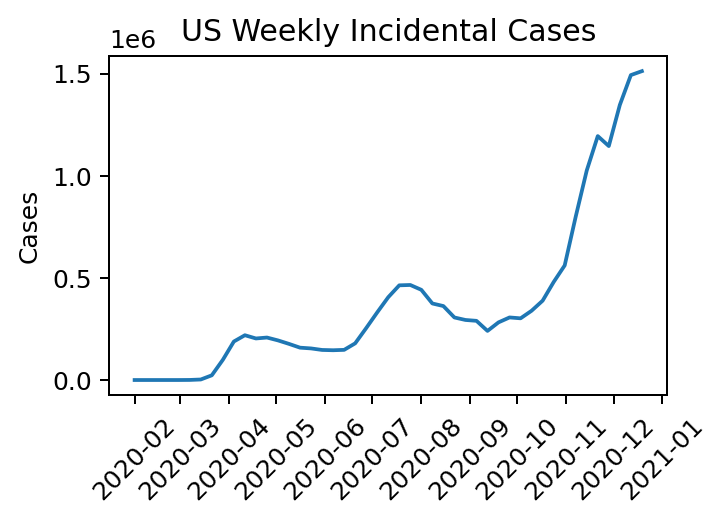

In [15]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases)

In [16]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')
FirstForecasts.to_pickle('../Data/ModelsANDForecasts.pkl')

100%|██████████| 3689/3689 [14:18<00:00,  4.30it/s]  


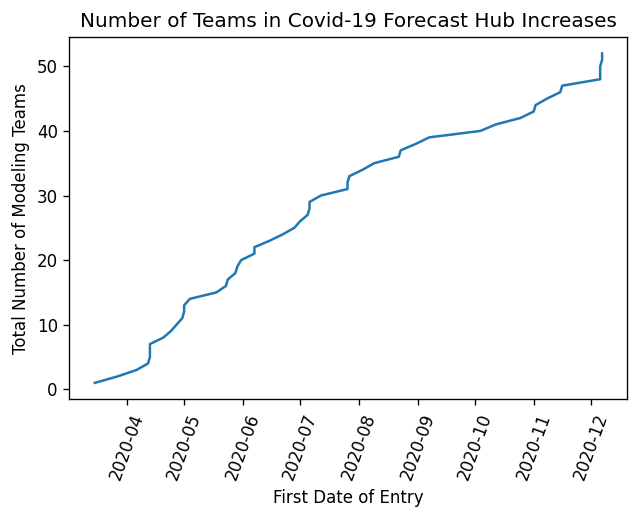

In [17]:
FirstForecasts = pd.read_pickle(S19.data_dir / 'ModelsANDForecasts.pkl')
S19.numberofteamsincovidhub(FirstForecasts, S19.figures_dir)

In [18]:
ScoreboardCases = pd.read_pickle(S19.data_dir / 'ScoreboardCases.pkl')

In [19]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [20]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

Maximum % conversion error:
2.2265654794189182
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. UCLA:SuEIR
3. IowaStateLW:STEM
4. Columbia_UNC:SurvCon
5. Covid19Sim:Simulator
6. JHU_IDD:CovidSP
7. USACE:ERDC_SEIR
8. CovidAnalytics:DELPHI
9. RobertWalraven:ESG
10. LNQ:ens1
11. IHME:CurveFit
12. COVIDhub:ensemble
13. Karlen:pypm
14. DDS:NBDS
15. CU:nochange
16. CU:scenario_low
17. CU:scenario_high
18. CU:select
19. CU:scenario_mid
20. CEID:Walk
21. JHUAPL:Bucky
22. BPagano:RtDriven
23. JHU_CSSE:DECOM
24. USC:SI_kJalpha_RF
25. JCB:PRM
26. UChicagoCHATTOPADHYAY:UnIT
27. UCF:AEM
28. USC:SI_kJalpha
29. UMich:RidgeTfReg
30. UVA:Ensemble
31. IQVIA_ACOE:STAN
32. OneQuietNight:ML
33. QJHong:Encounter
34. IEM_MED:CovidProject
Models in the latest Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


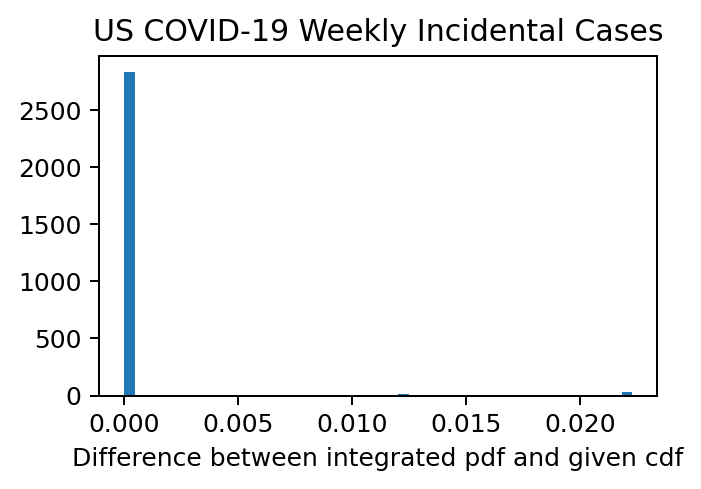

In [21]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)
ScoreboardCases.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

<Figure size 1800x1200 with 0 Axes>

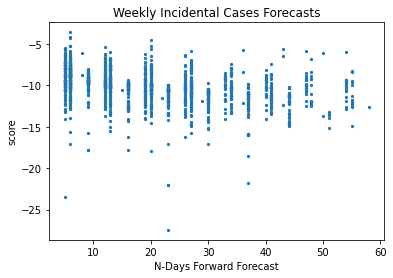

<Figure size 1800x1200 with 0 Axes>

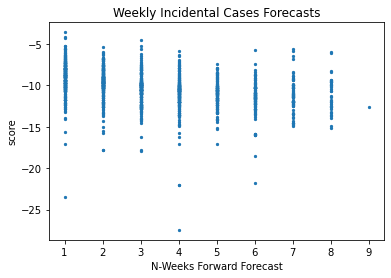

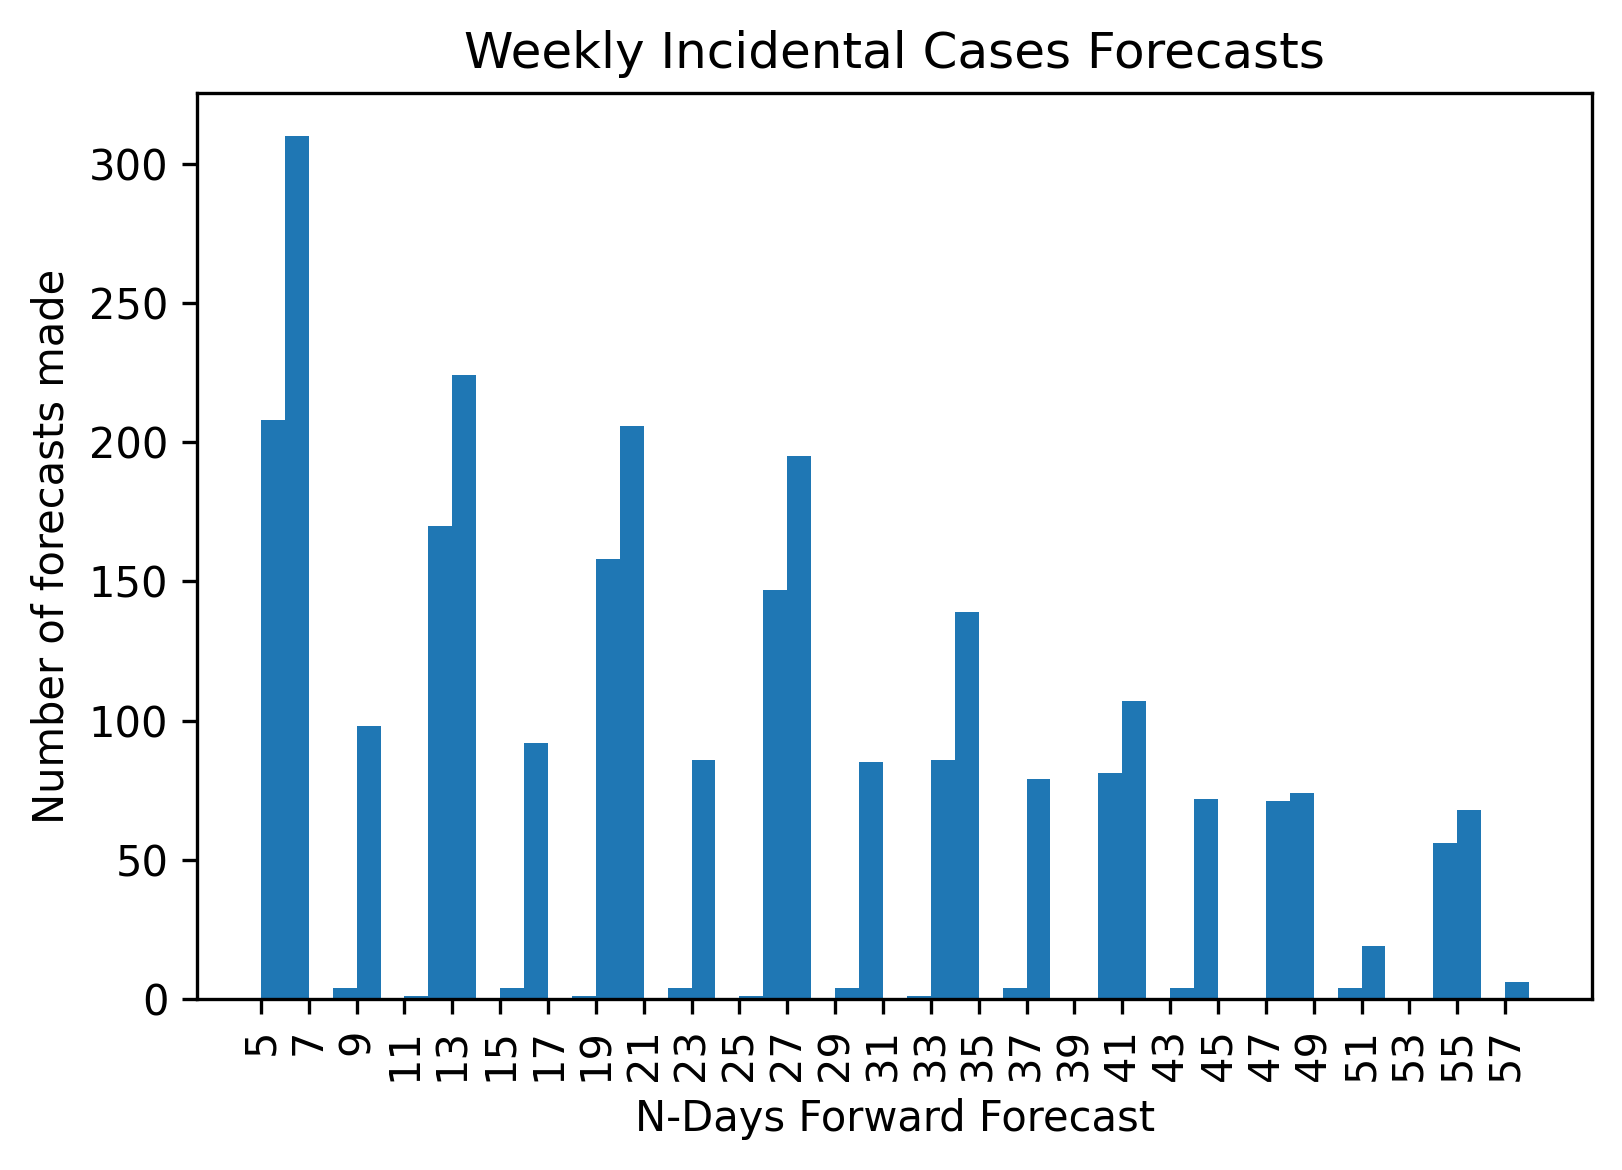

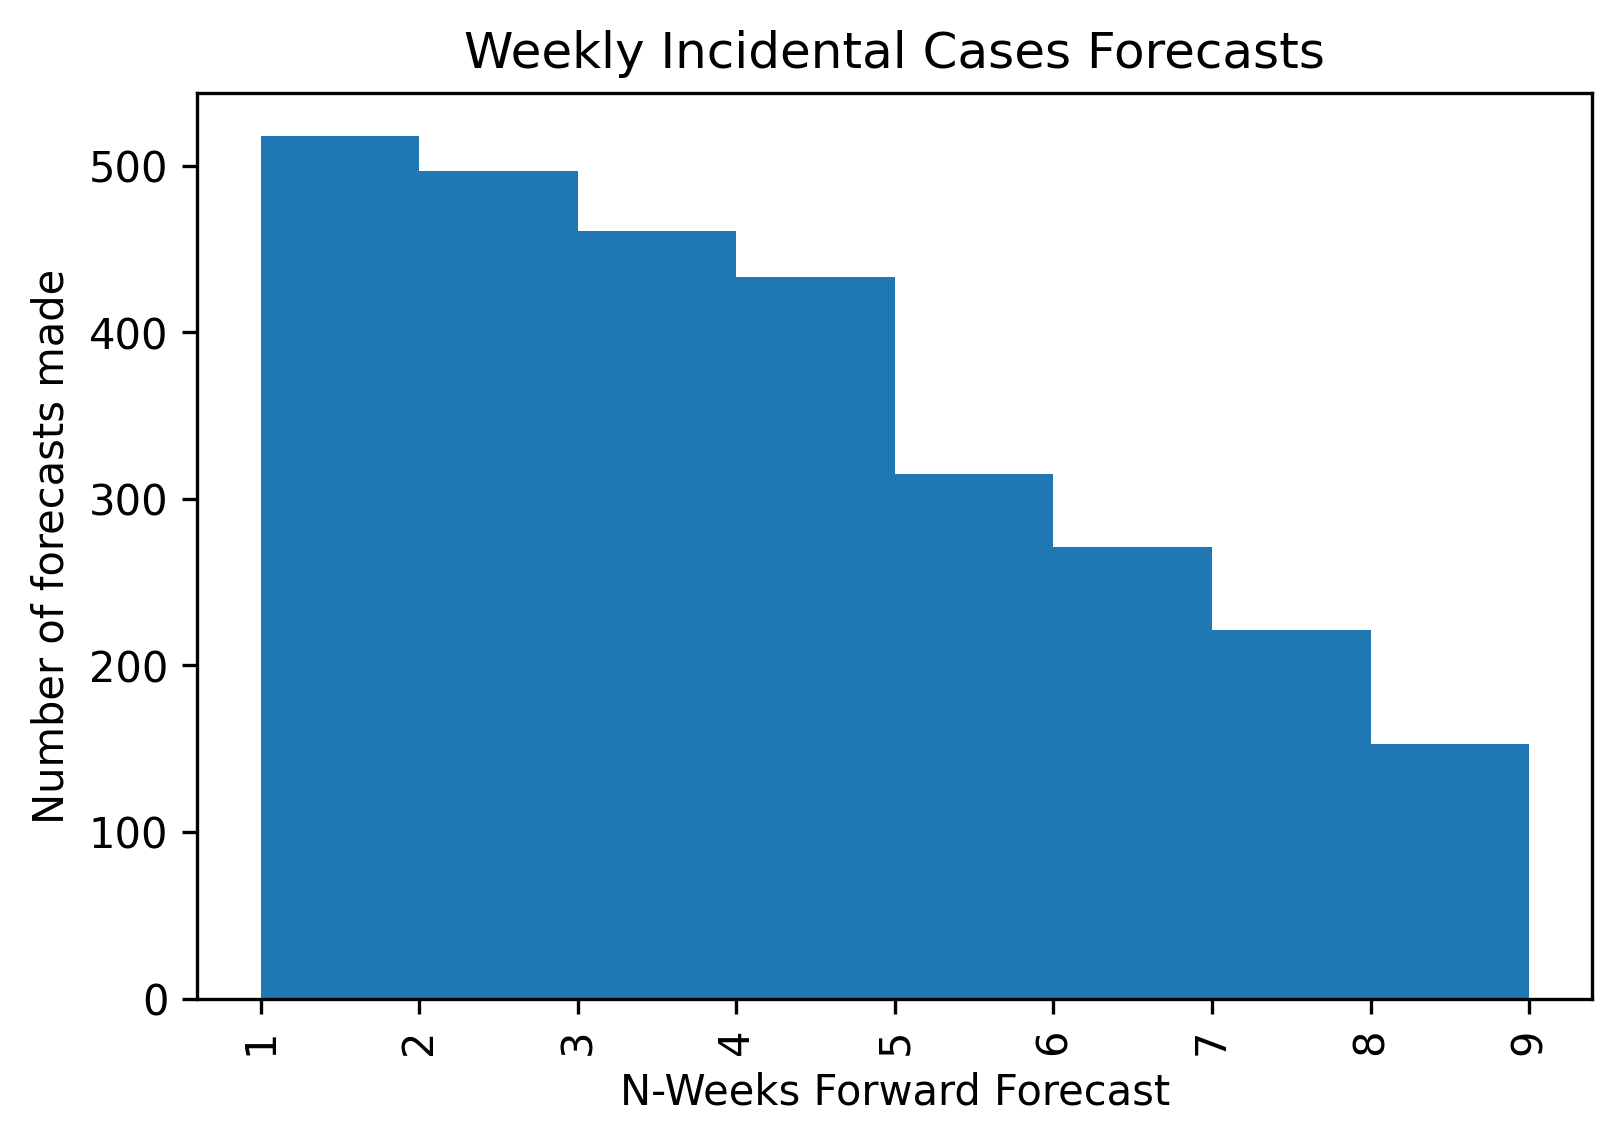

0

In [22]:
S19.plotallscoresdist(ScoreboardCases,'Case')

# Some +Case Forecasts and the Actual Epidemiology

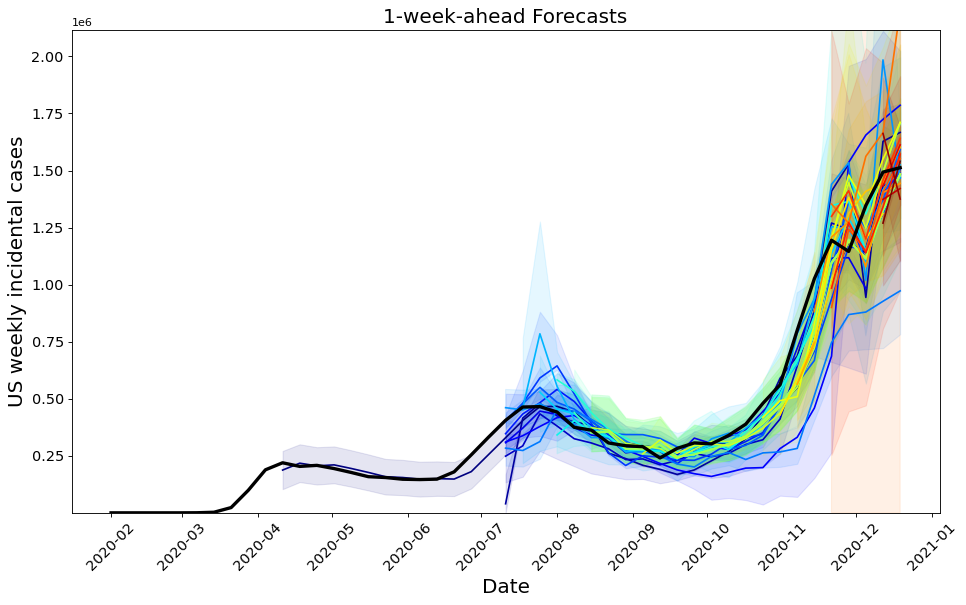

In [23]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

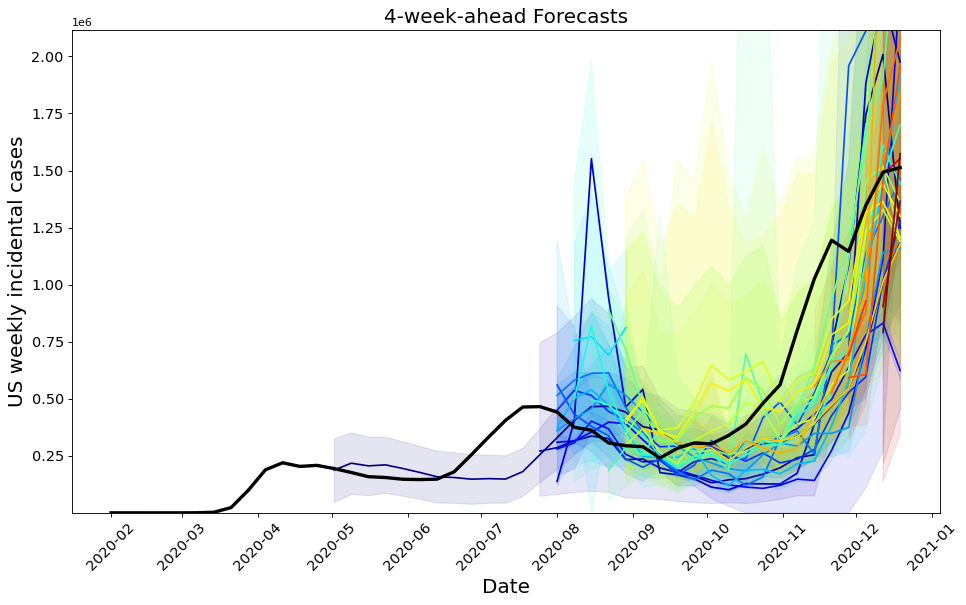

In [24]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

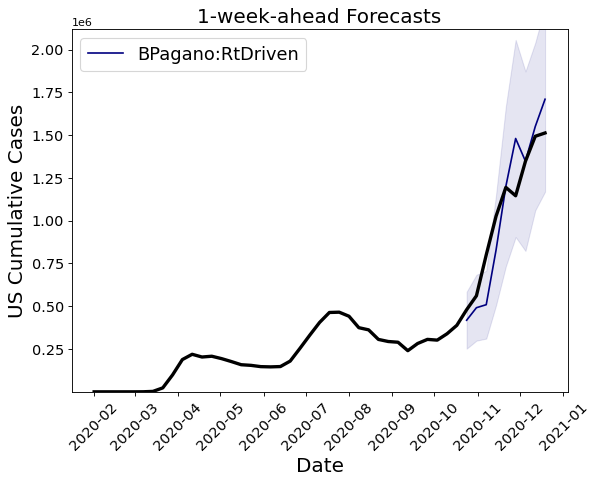

In [25]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,['BPagano:RtDriven'])

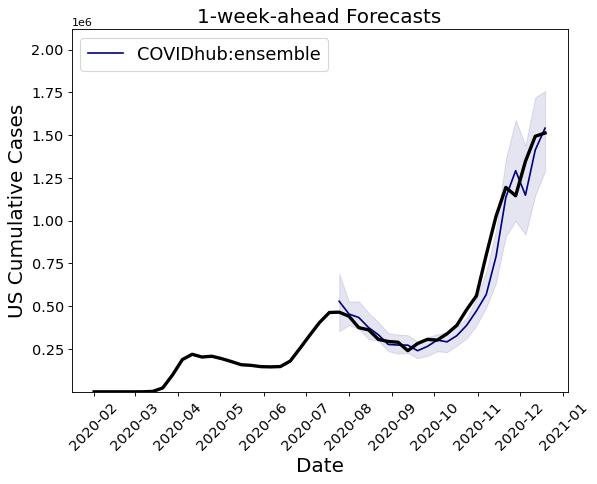

In [26]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,['COVIDhub:ensemble'])

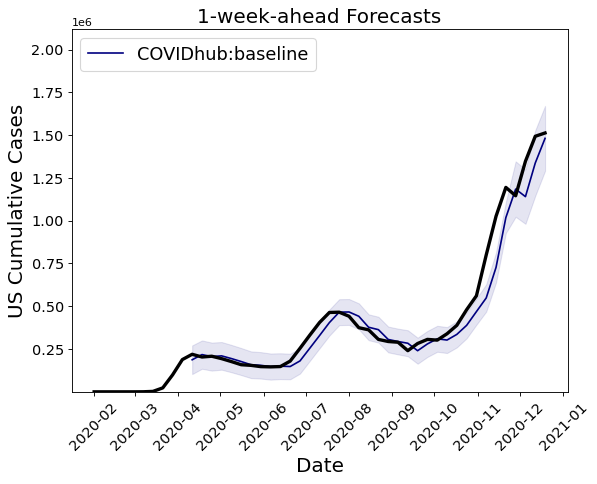

In [27]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,['COVIDhub:baseline'])

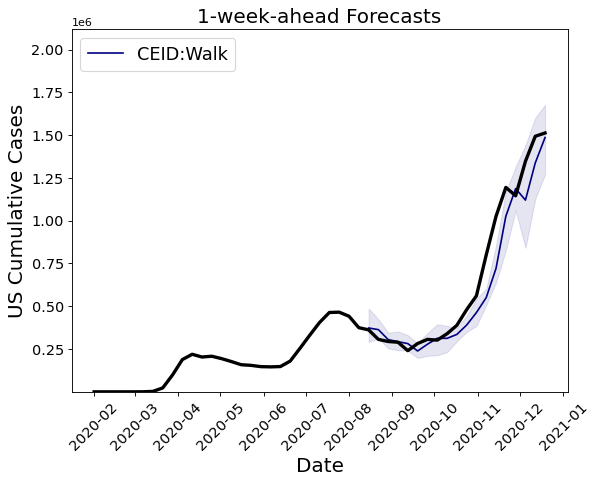

In [28]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,['CEID:Walk'])

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

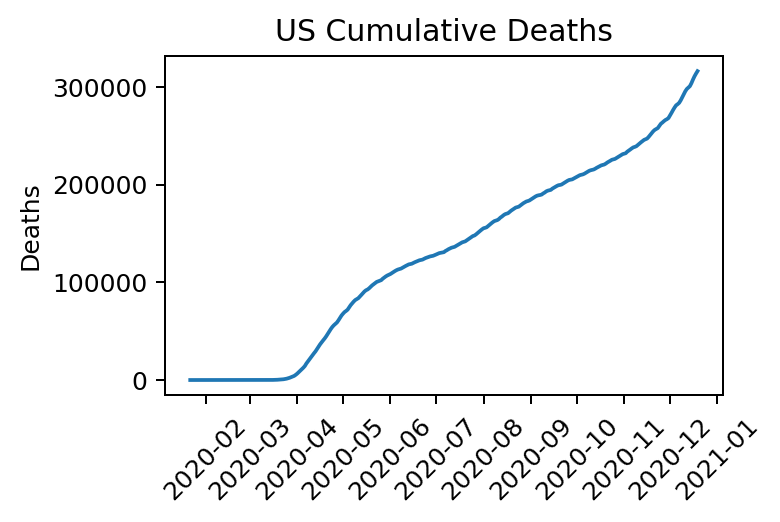

In [29]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths)

In [30]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

100%|██████████| 8981/8981 [04:10<00:00, 35.83it/s]  


In [31]:
ScoreboardDeaths = pd.read_pickle(S19.data_dir / 'ScoreboardDeaths.pkl')

In [32]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [33]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

Maximum % conversion error:
1.873137835764016
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. COVIDhub:baseline
3. CU:select
4. CU:scenario_mid
5. CU:scenario_low
6. CU:scenario_high
7. CU:nochange
8. UMass:ExpertCrowd
9. YYG:ParamSearch
10. UT:Mobility
11. JHU_IDD:CovidSP
12. COVIDhub:ensemble
13. MOBS:GLEAM_COVID
14. LANL:GrowthRate
15. CovidAnalytics:DELPHI
16. UCLA:SuEIR
17. GT:DeepCOVID
18. IHME:CurveFit
19. IowaStateLW:STEM
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. Columbia_UNC:SurvCon
33. RobertWalraven:ESG
34. UMich:RidgeTfReg
35. Karlen:pypm
36. UCM_MESALab:FoGSEIR
37. DDS:NBDS
38. RPI_UW:Mob_Collision
39. CEID:Walk
40. WalmartLabsML:LogForecasting
41. SteveMcConnell:CovidComplete
42. JHUAPL:Bucky
43. UCSD_NEU:DeepGLEAM
44. BPagano:R

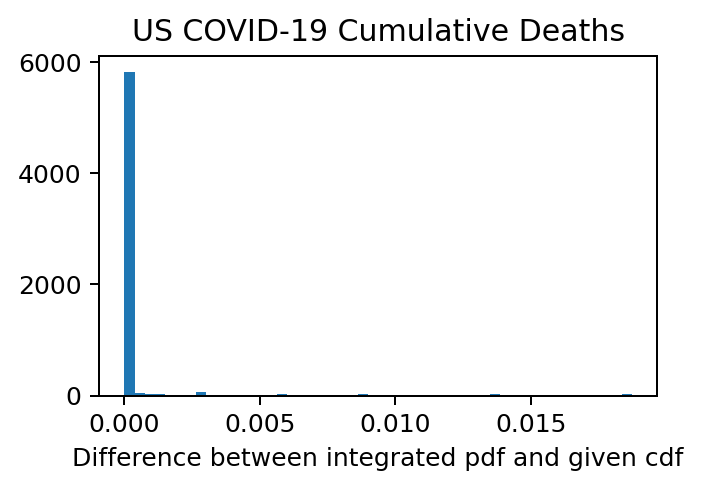

In [34]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

<Figure size 1800x1200 with 0 Axes>

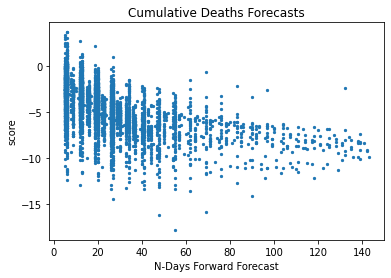

<Figure size 1800x1200 with 0 Axes>

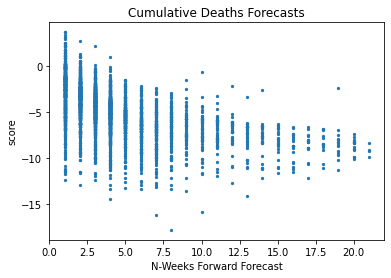

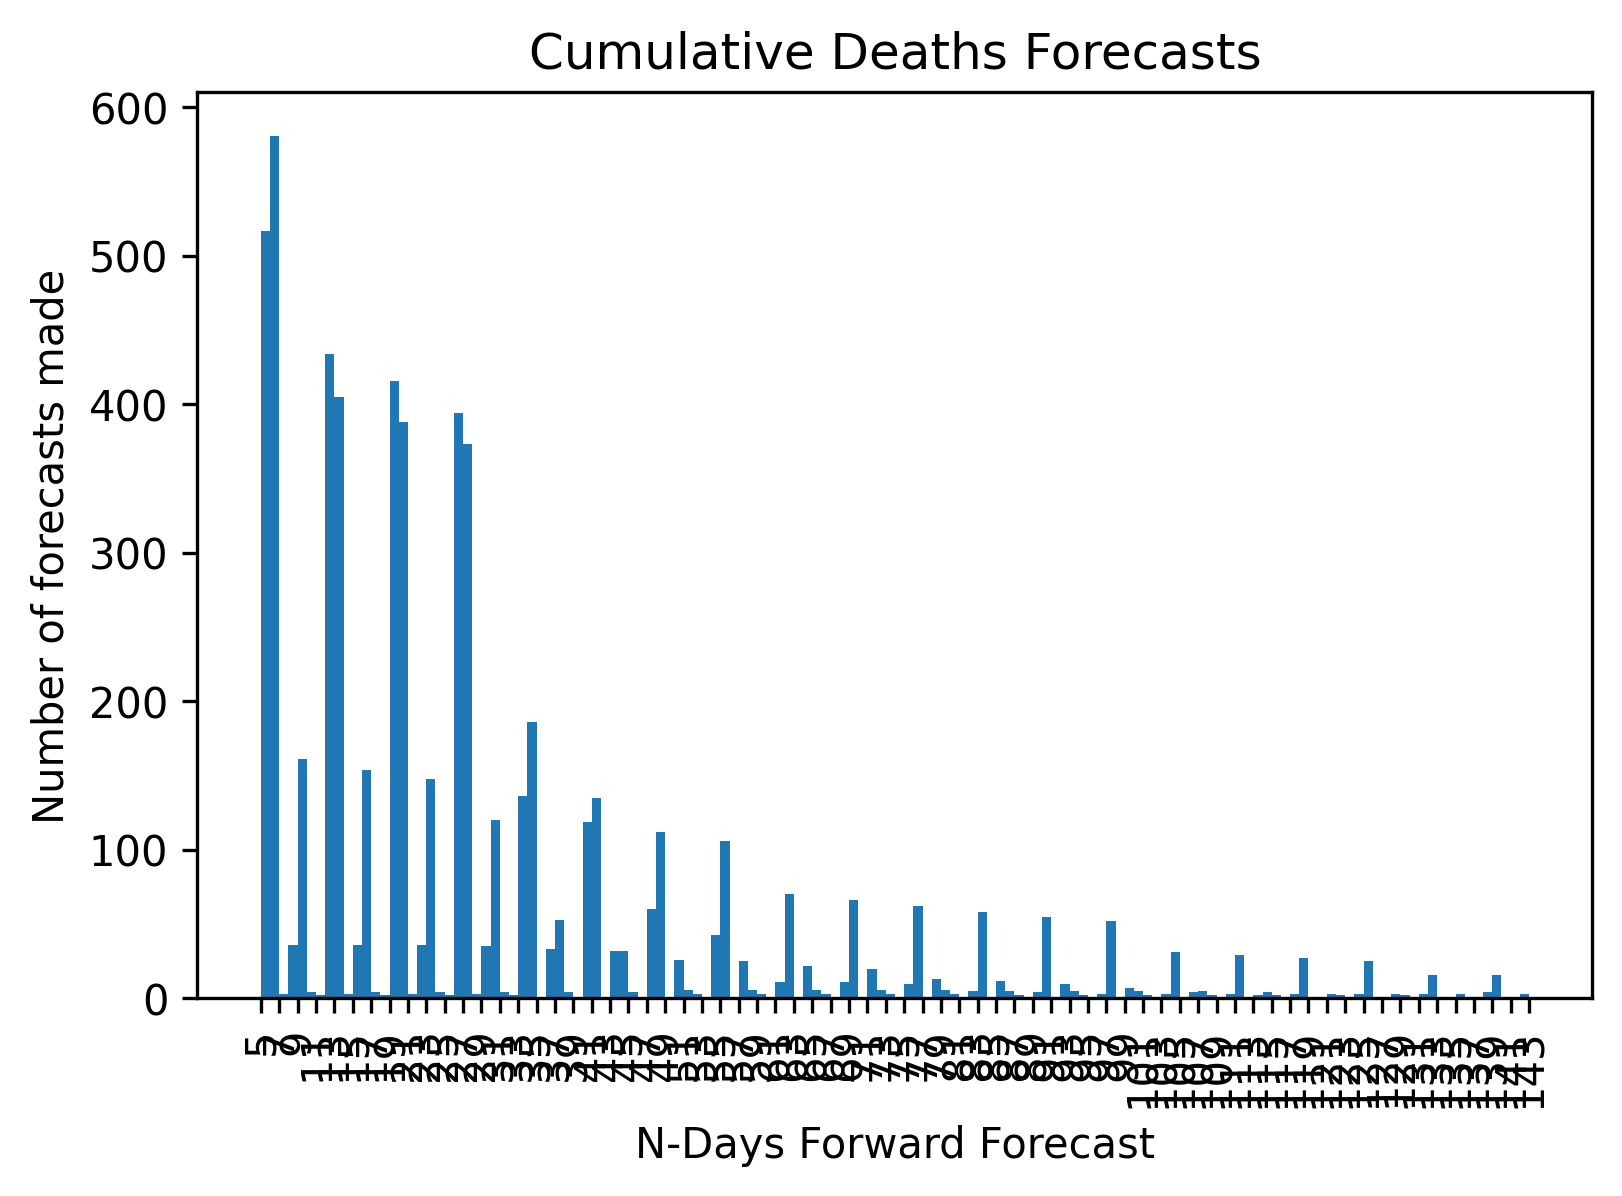

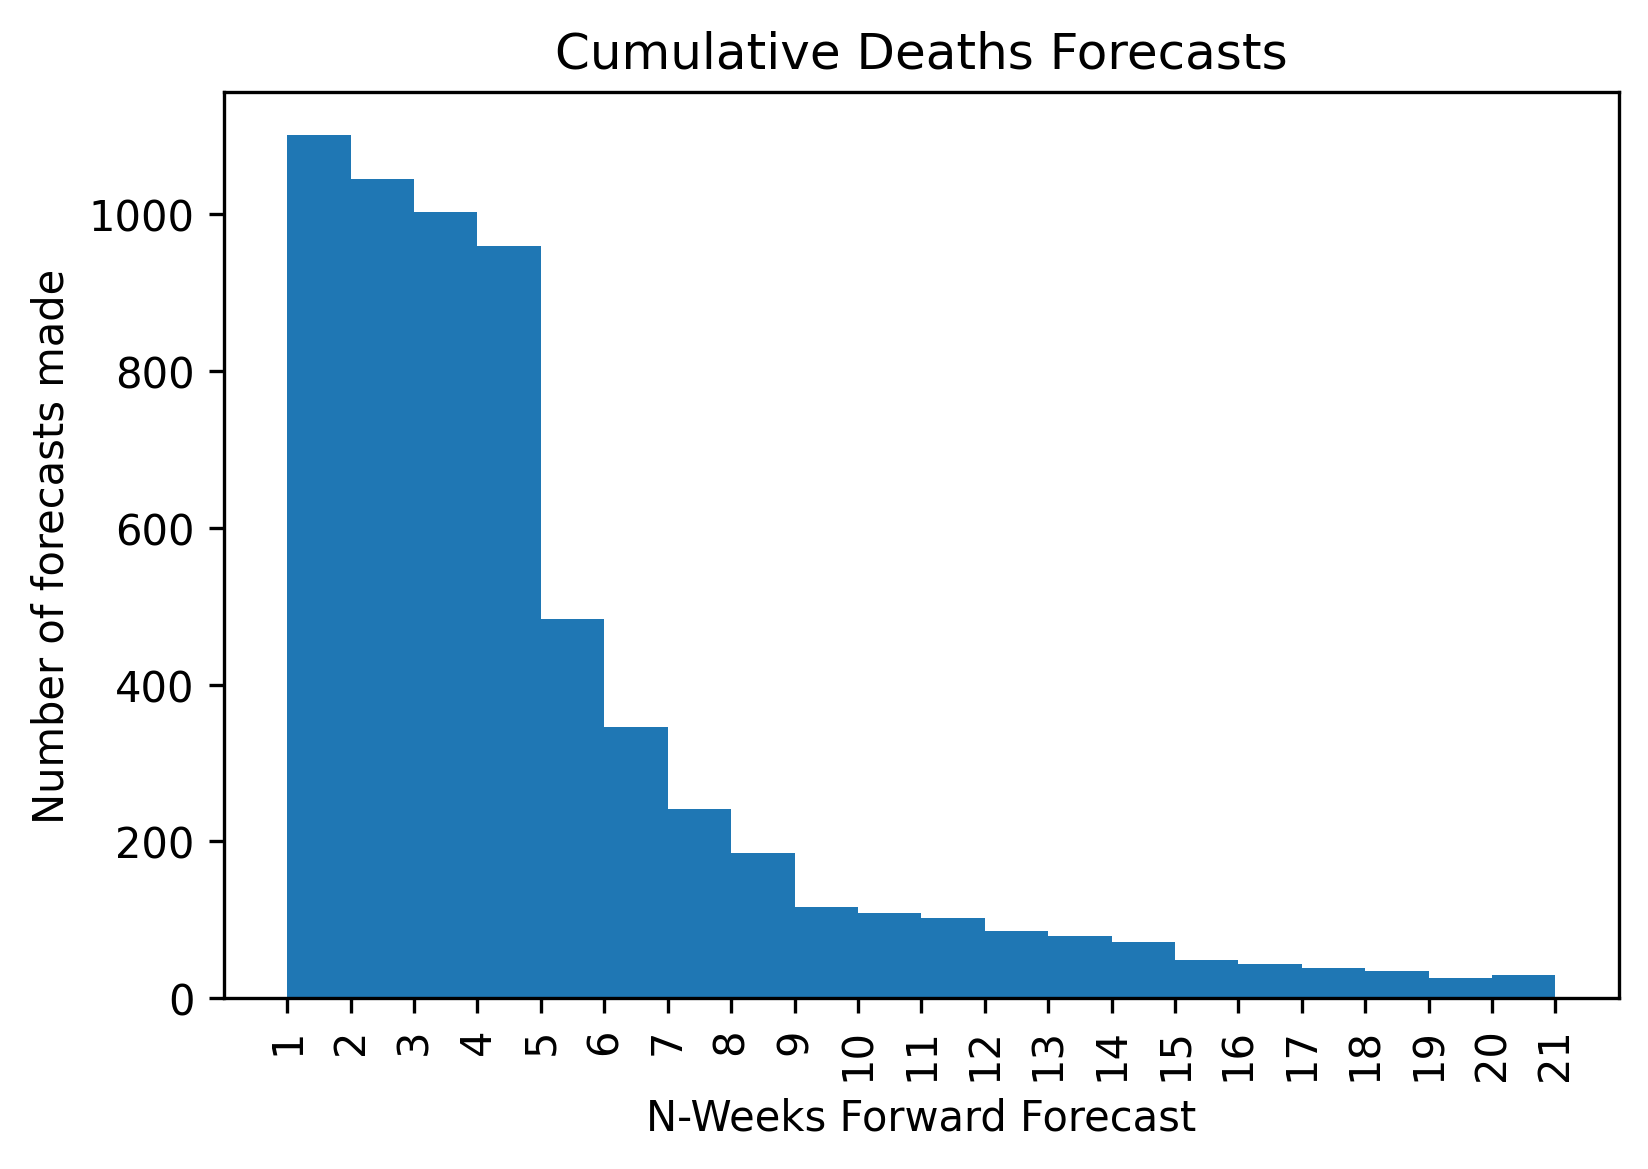

0

In [35]:
S19.plotallscoresdist(ScoreboardDeaths,'Death')

# Some Death Forecasts and the Actual Epidemiology

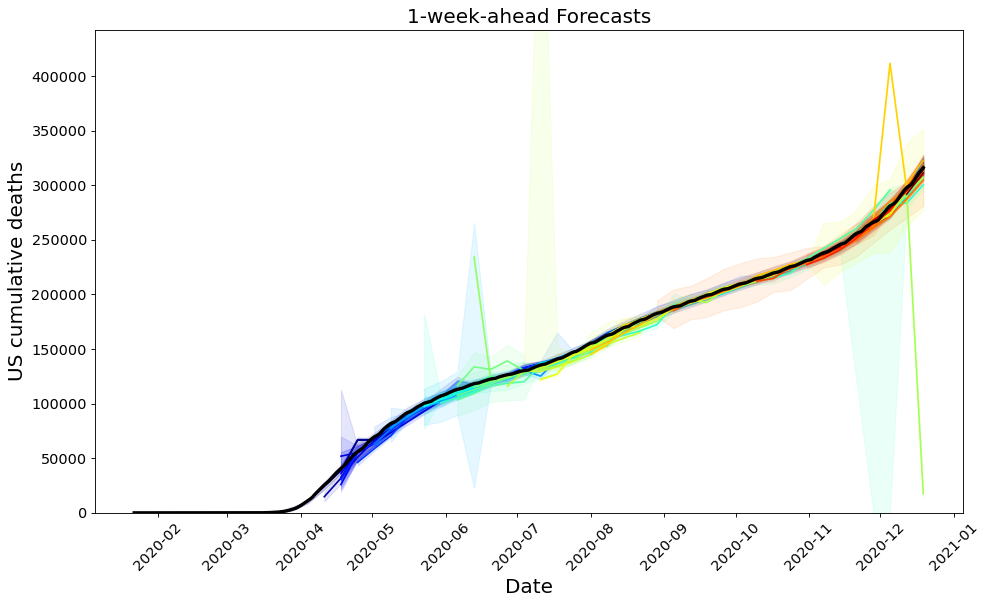

In [36]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

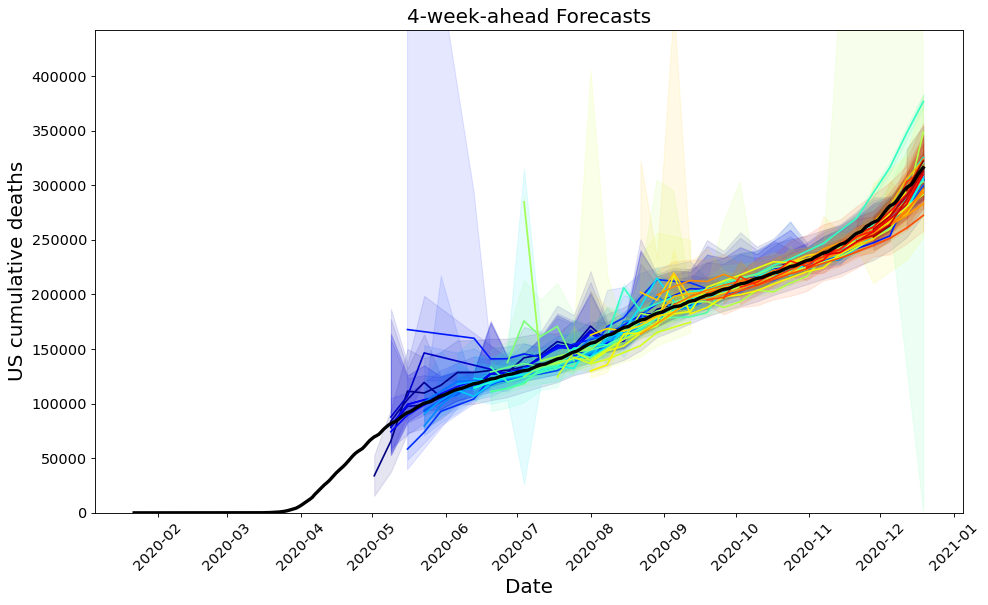

In [37]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

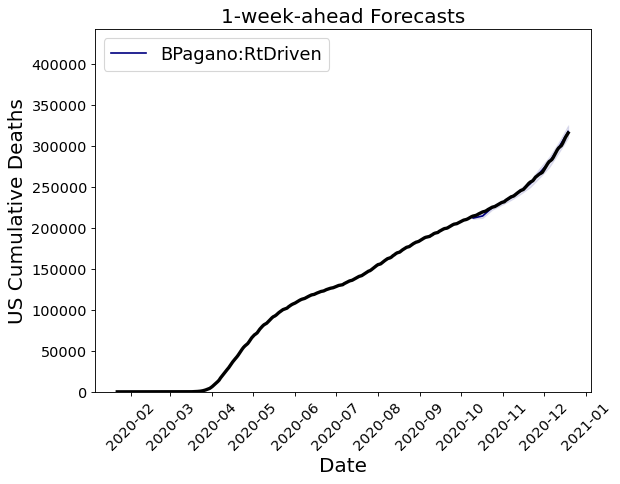

In [38]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,['BPagano:RtDriven'])

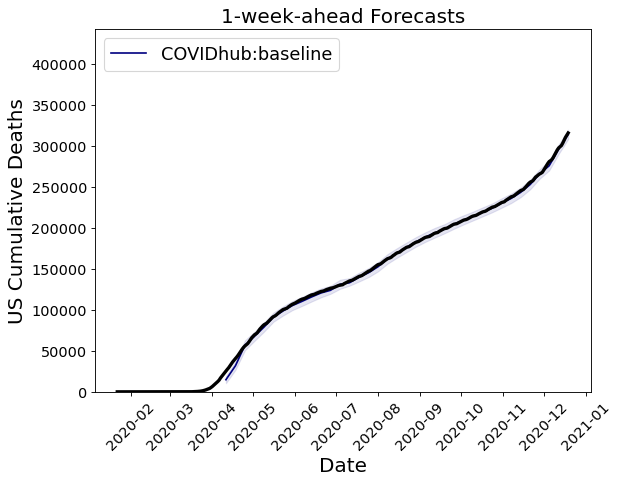

In [39]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,['COVIDhub:baseline'])

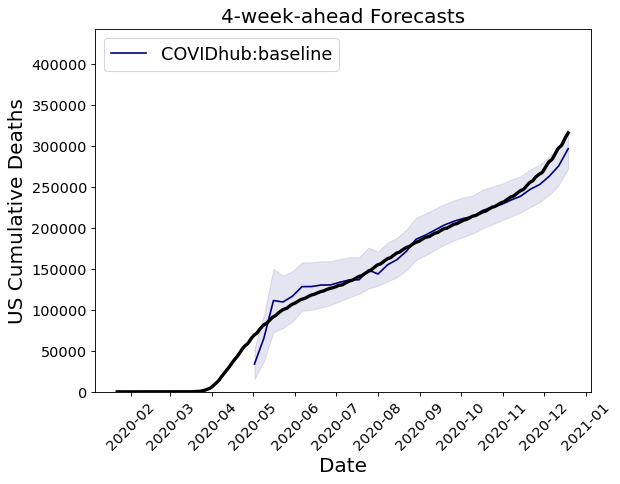

In [40]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,['COVIDhub:baseline'])

# Data Set Summary

In [41]:
#Number of Unique Case Forecasting Models in the data set 
len(ScoreboardCases['model'].unique())

35

In [42]:
#Number of Unique Cumulative Death Forecasting Models in the data set 
len(ScoreboardDeaths['model'].unique())

53

In [43]:
print('Number of forecast entries: Weekly Incident Cases')
len(ScoreboardCases[(ScoreboardCases.model != 'FDANIH:Sunweight') & (ScoreboardCases.model != 'FDANIH:Sweight')])

Number of forecast entries: Weekly Incident Cases


2869

In [44]:
print('Number of forecast entries: Cumulative Deaths')
len(ScoreboardDeaths[(ScoreboardDeaths.model != 'FDANIH:Sunweight') & (ScoreboardDeaths.model != 'FDANIH:Sweight')])

Number of forecast entries: Cumulative Deaths


6146

In [45]:
print('list of all models')
listallmod = ScoreboardDeaths.model.unique().tolist()+ScoreboardCases.model.unique().tolist()
listmodels = np.unique(listallmod)
print(listmodels)
print(str(len(listmodels)))

list of all models
['Auquan:SEIR' 'BPagano:RtDriven' 'CEID:Walk' 'COVIDhub:baseline'
 'COVIDhub:ensemble' 'CU:nochange' 'CU:scenario_high' 'CU:scenario_low'
 'CU:scenario_mid' 'CU:select' 'Columbia_UNC:SurvCon'
 'Covid19Sim:Simulator' 'CovidActNow:SEIR_CAN' 'CovidAnalytics:DELPHI'
 'DDS:NBDS' 'GT:DeepCOVID' 'IEM_MED:CovidProject' 'IHME:CurveFit'
 'IQVIA_ACOE:STAN' 'Imperial:ensemble1' 'Imperial:ensemble2'
 'IowaStateLW:STEM' 'JCB:PRM' 'JHUAPL:Bucky' 'JHU_CSSE:DECOM'
 'JHU_IDD:CovidSP' 'Karlen:pypm' 'LANL:GrowthRate' 'LNQ:ens1'
 'MITCovAlliance:SIR' 'MIT_CritData:GBCF' 'MOBS:GLEAM_COVID' 'MSRA:DeepST'
 'Microsoft:DeepSTIA' 'NotreDame:mobility' 'OliverWyman:Navigator'
 'OneQuietNight:ML' 'PSI:DRAFT' 'QJHong:Encounter' 'RPI_UW:Mob_Collision'
 'RobertWalraven:ESG' 'SWC:TerminusCM' 'SteveMcConnell:CovidComplete'
 'UA:EpiCovDA' 'UCF:AEM' 'UCLA:SuEIR' 'UCM_MESALab:FoGSEIR'
 'UCSD_NEU:DeepGLEAM' 'UChicagoCHATTOPADHYAY:UnIT' 'UMass:ExpertCrowd'
 'UMass:MechBayes' 'UMich:RidgeTfReg' 'USACE:ERDC_

# Get weighted and unweighted model forecasts

In [46]:
for WeeksAhead in range(1,7):
    ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-07-04','Cases',WeeksAhead,'weighted')
    ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-07-04','Deaths',WeeksAhead,'weighted')
    ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-07-04','Cases',WeeksAhead,'unweighted')
    ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-07-04','Deaths',WeeksAhead,'unweighted')

# Get forecast ranks constrained by target_end_dates and Weeks_ahead

In [47]:
#DEATHS: Get the weekly forecast score rankings
grouped =  ScoreboardDeaths.groupby(['target_end_date','deltaW'])
ScoreboardDeaths['rank'] = grouped['score'].transform(lambda x: pd.factorize(-x, sort=True)[0]+1)
ScoreboardDeaths.to_pickle('../Data/ScoreboardDeaths.pkl')

#CASES: Get the weekly forecast score rankings
grouped =  ScoreboardCases.groupby(['target_end_date','deltaW'])
ScoreboardCases['rank'] = grouped['score'].transform(lambda x: pd.factorize(-x, sort=True)[0]+1)
ScoreboardCases.to_pickle('../Data/ScoreboardCases.pkl')

# UNWEIGHTED FORECASTING

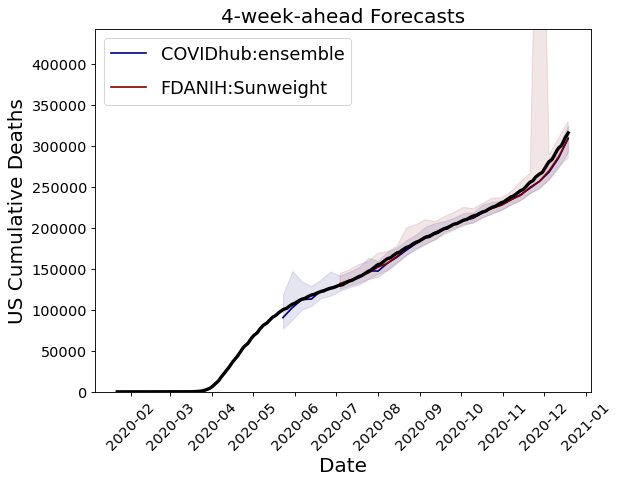

In [48]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,['COVIDhub:ensemble','FDANIH:Sunweight'])

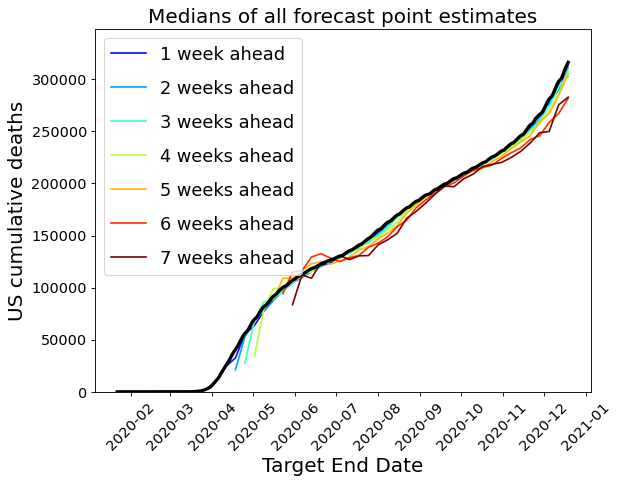

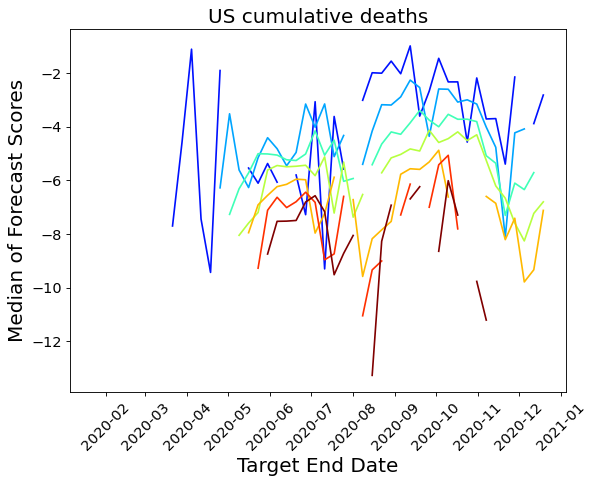

In [64]:
ScoreboardDeathsX = ScoreboardDeaths[(ScoreboardDeaths.model != 'FDANIH:Sunweight') & (ScoreboardDeaths.model != 'FDANIH:Sweight')].copy()
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeathsX,'Deaths',7)

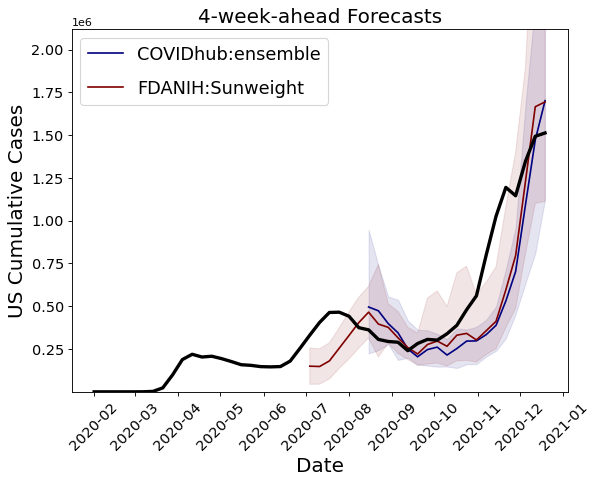

In [50]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,['COVIDhub:ensemble','FDANIH:Sunweight'])

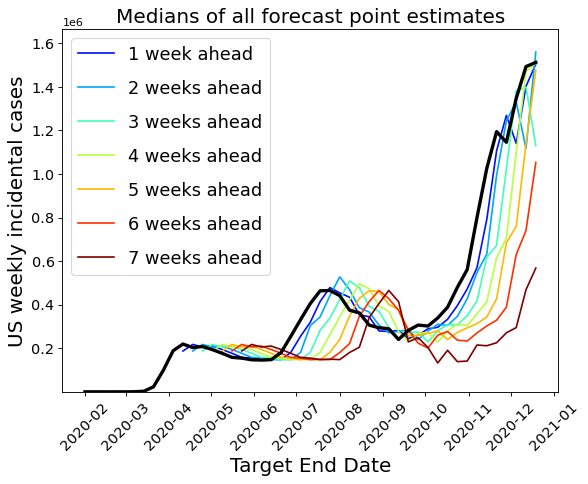

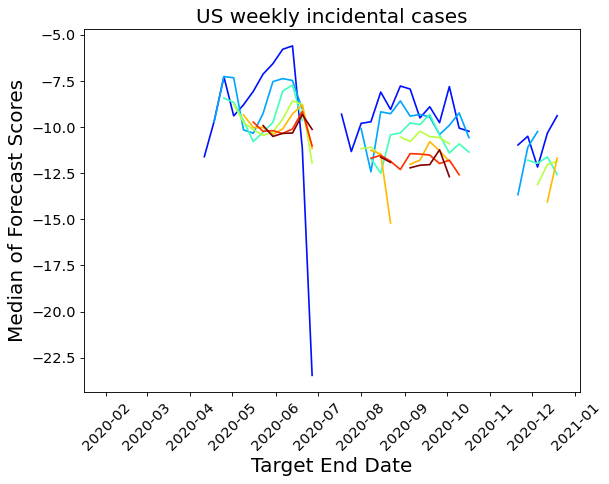

In [65]:
ScoreboardCasesX = ScoreboardCases[(ScoreboardCases.model != 'FDANIH:Sunweight') & (ScoreboardCases.model != 'FDANIH:Sweight')].copy()
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCasesX,'Cases',7)

# SCORE-WEIGHTED FORECASTING

## Deaths

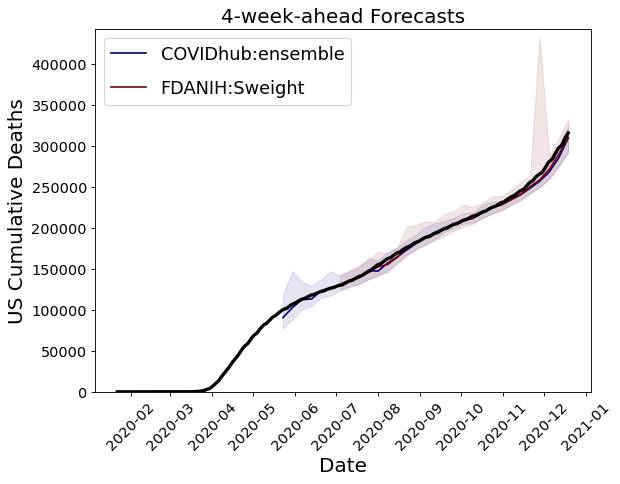

In [52]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,['COVIDhub:ensemble','FDANIH:Sweight'])

## Cases

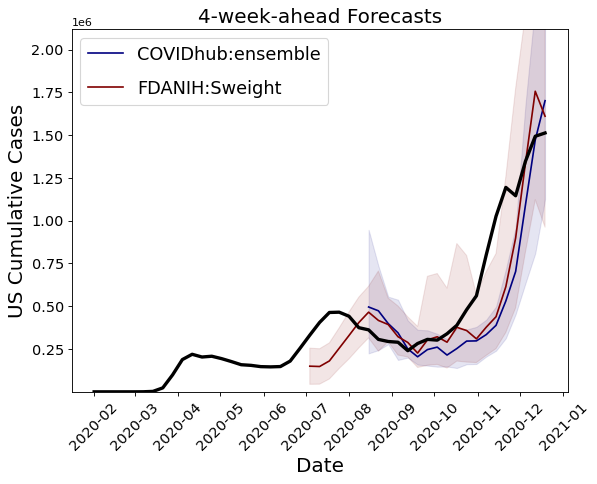

In [53]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,['COVIDhub:ensemble','FDANIH:Sweight'])

# ANALYSIS OF SCORES

## Plots by date forecast made

In [54]:
#S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, 1, 'Death')

In [55]:
#S19.plotgroupsFD(ScoreboardCases, modeltypesCases, 1, 'Case')

## Plots by model type model averaged

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


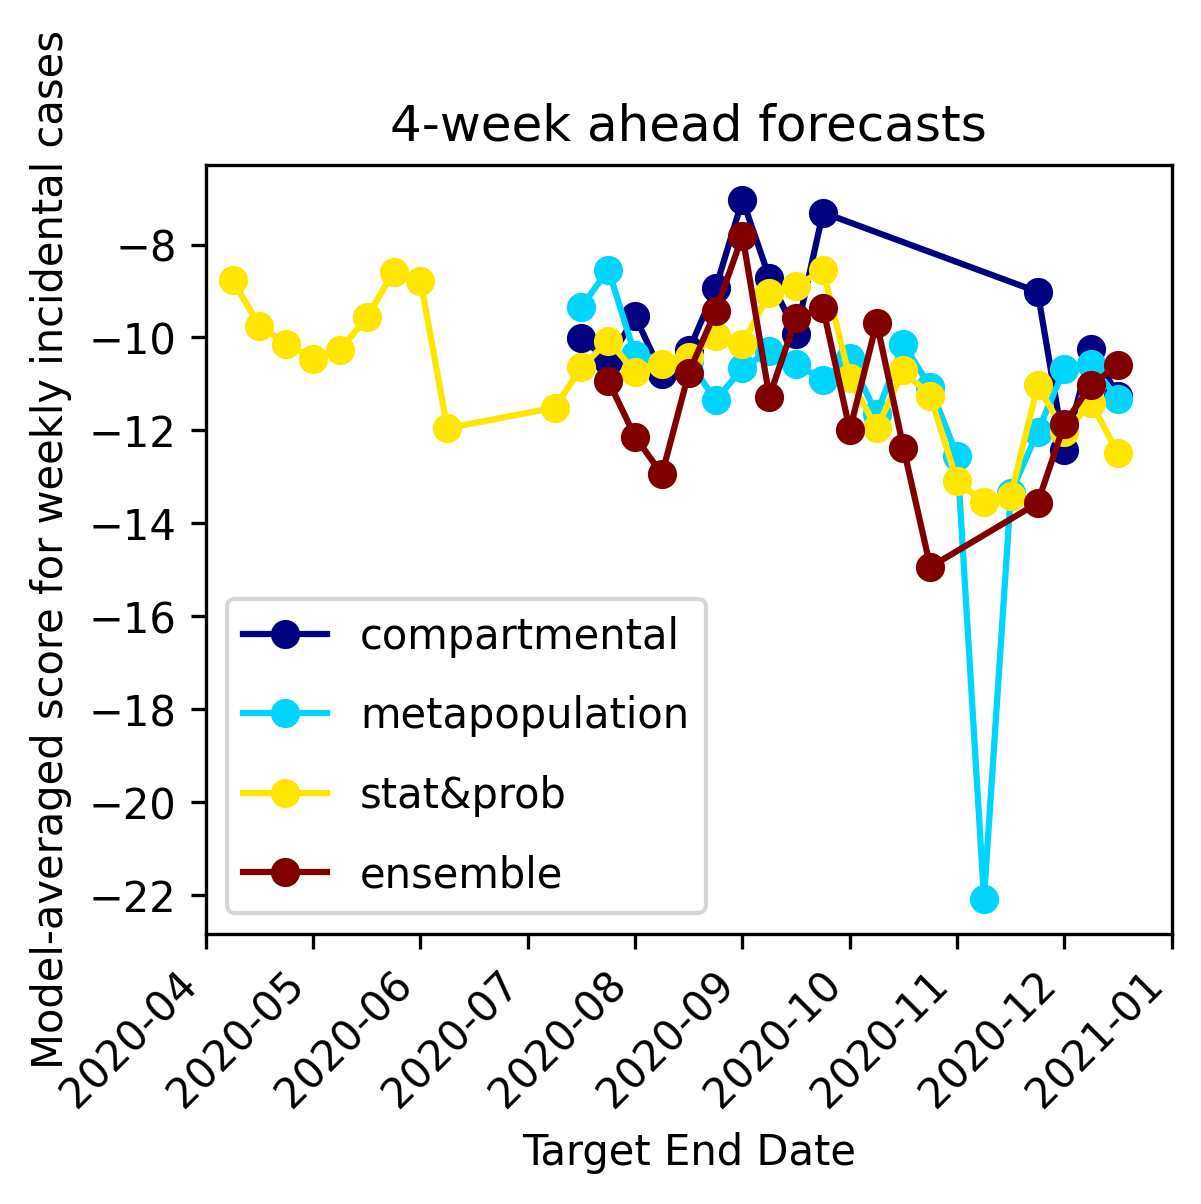

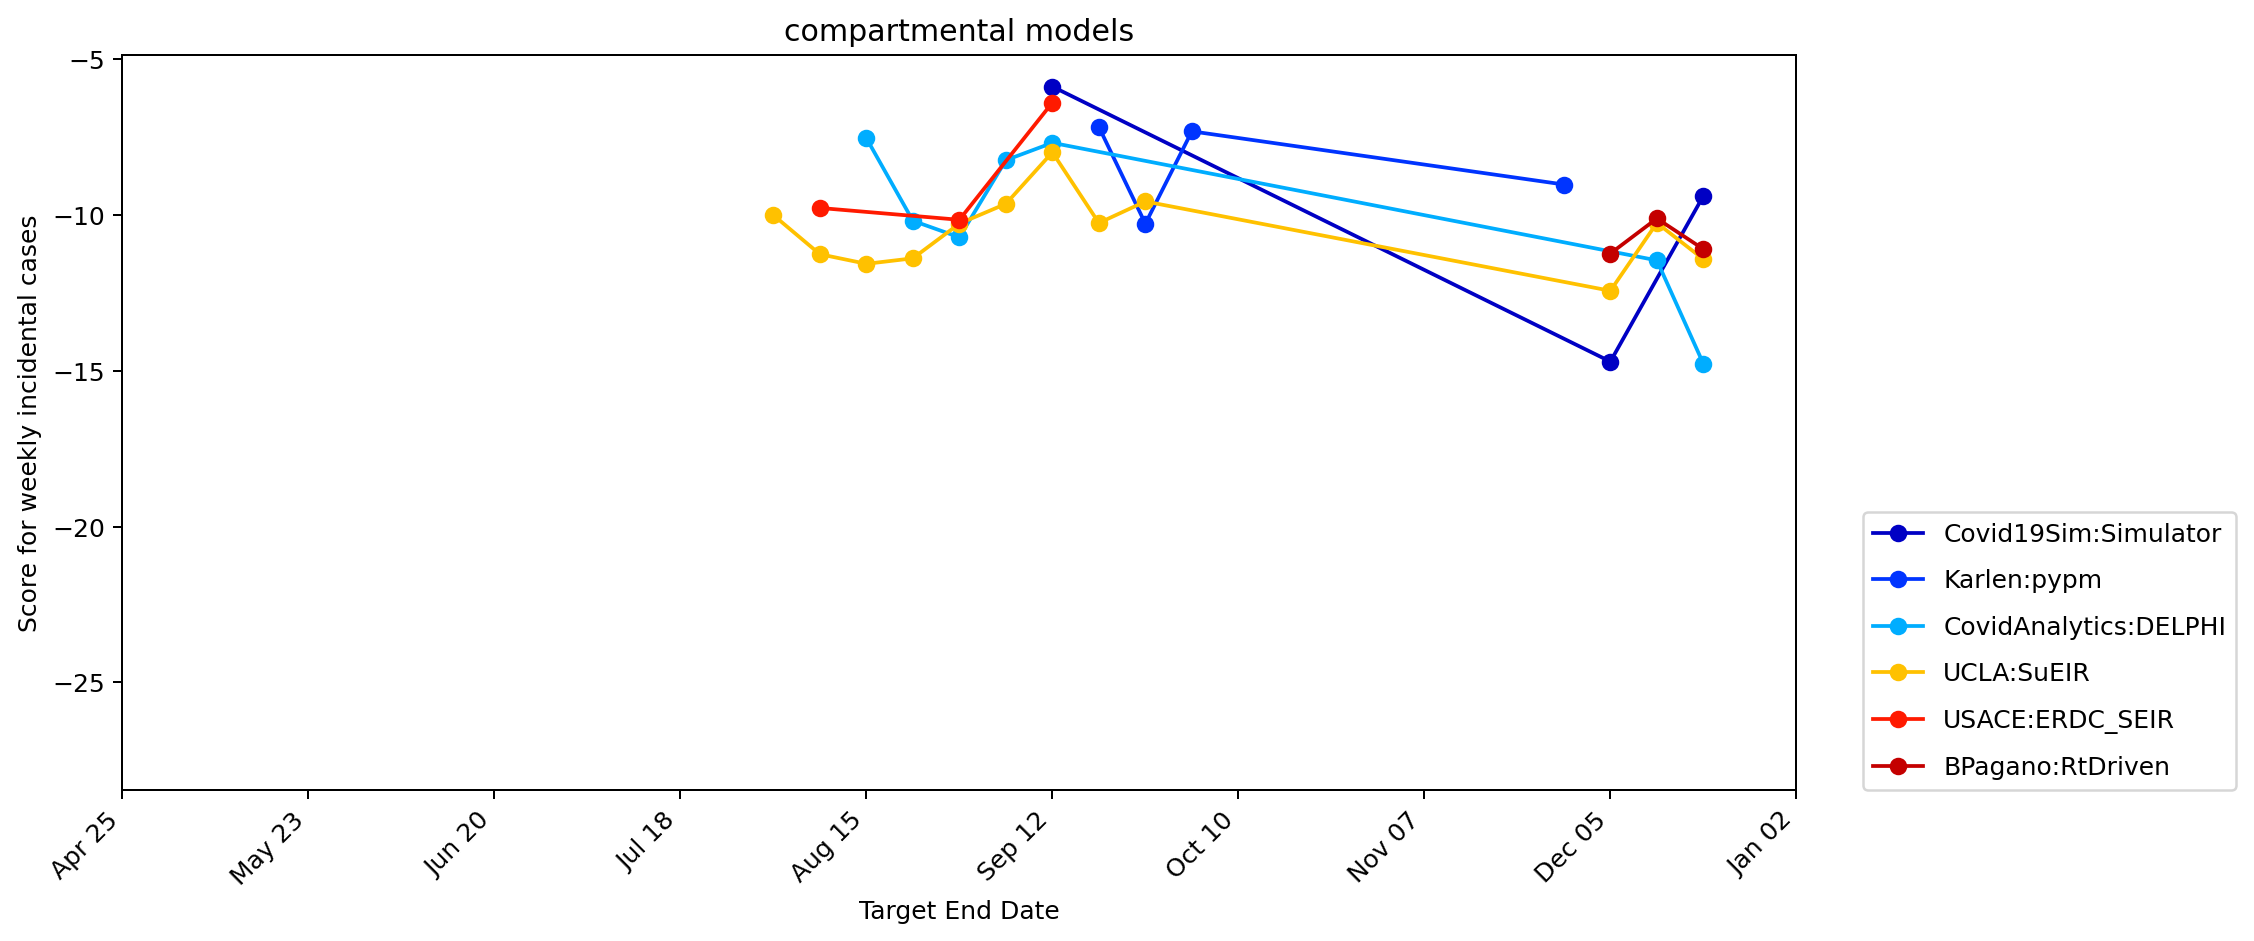

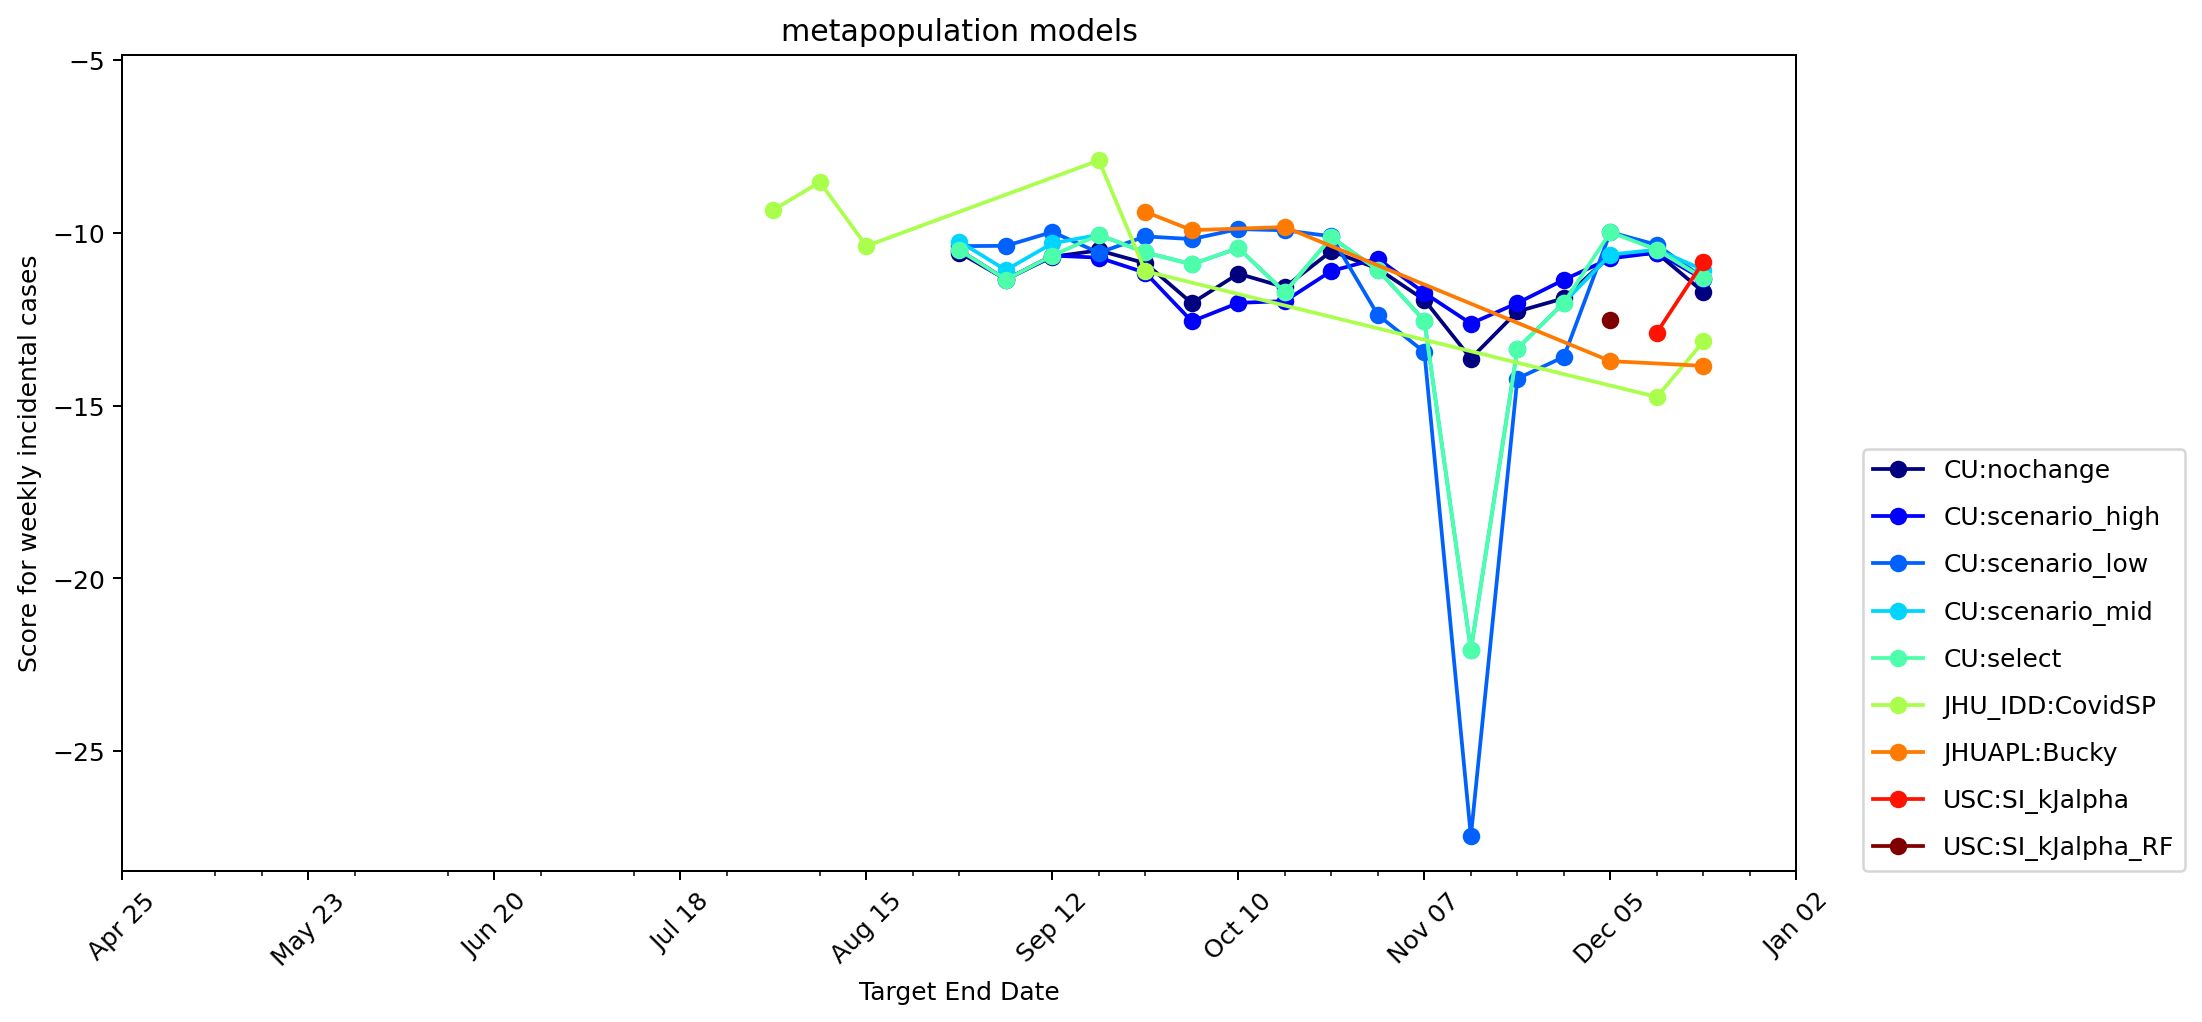

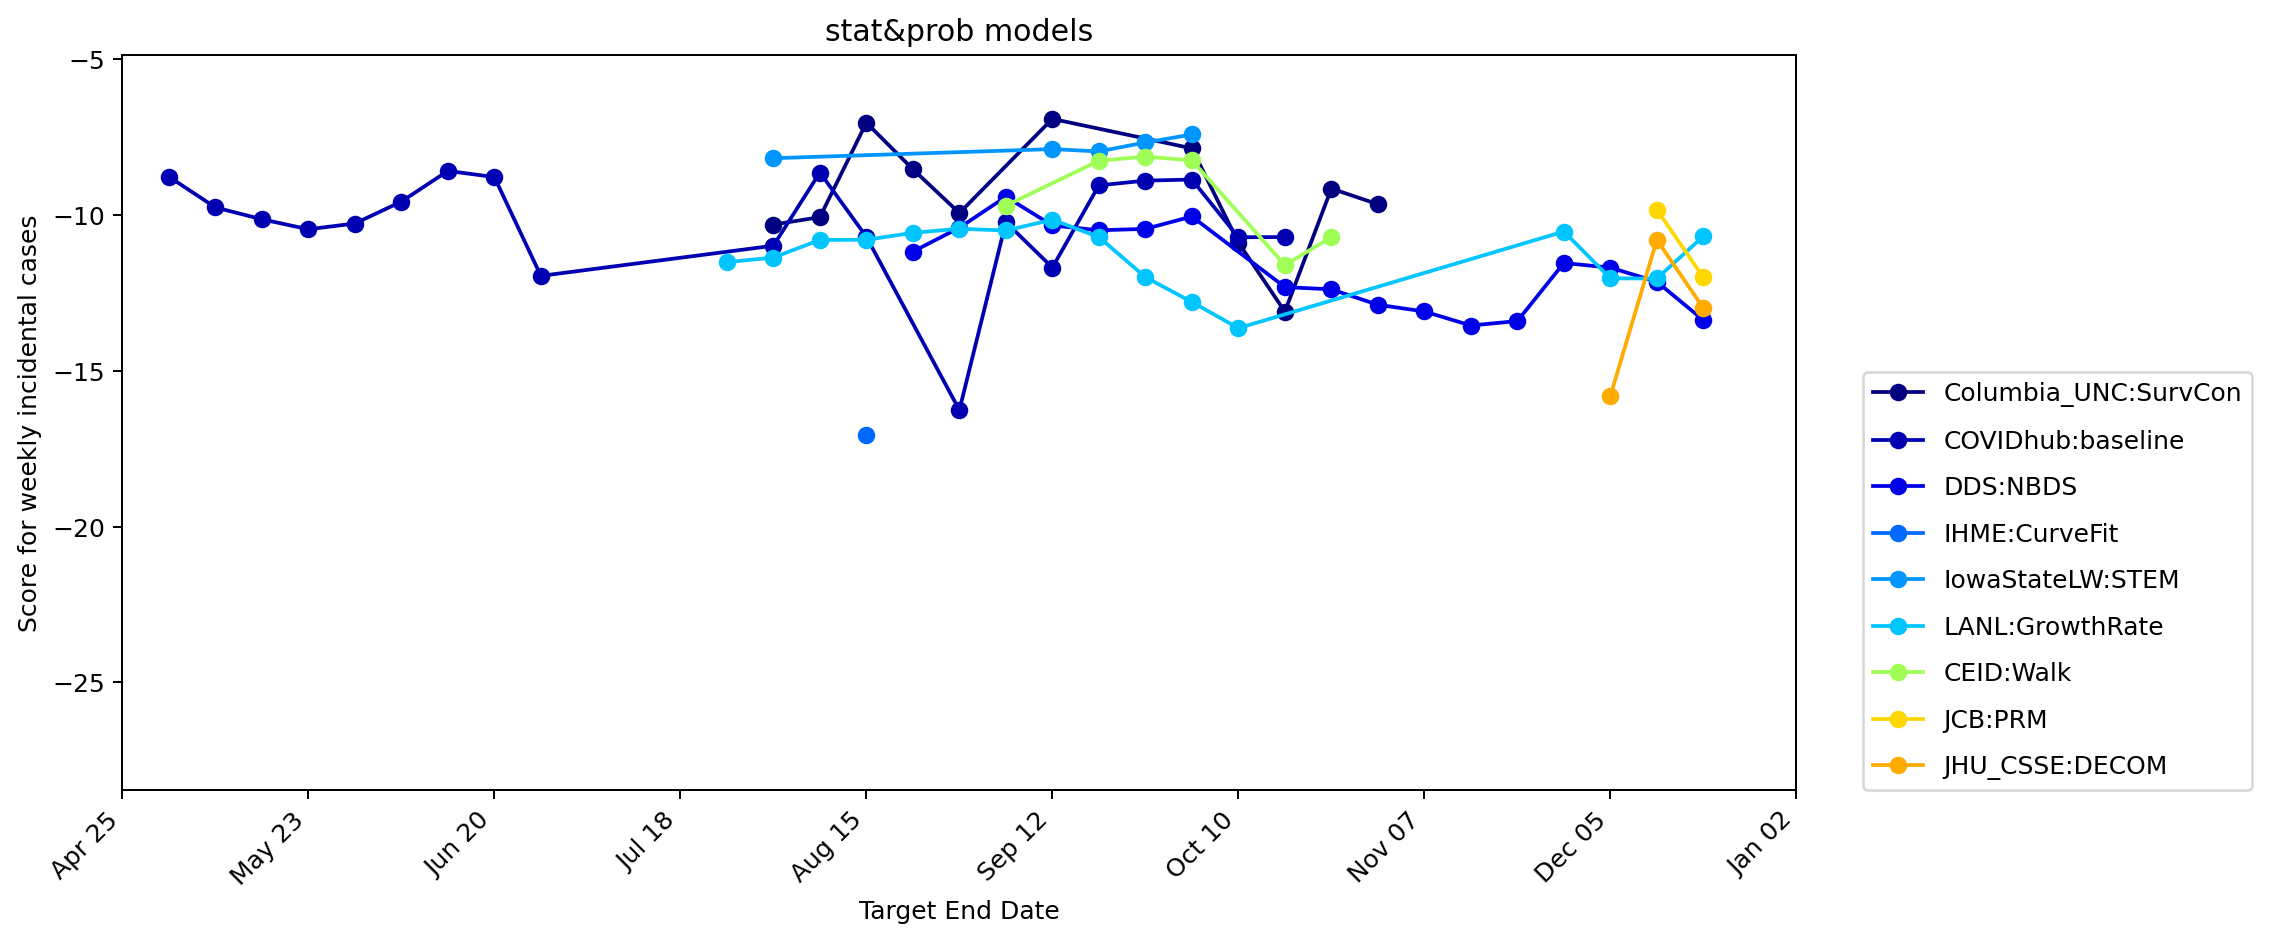

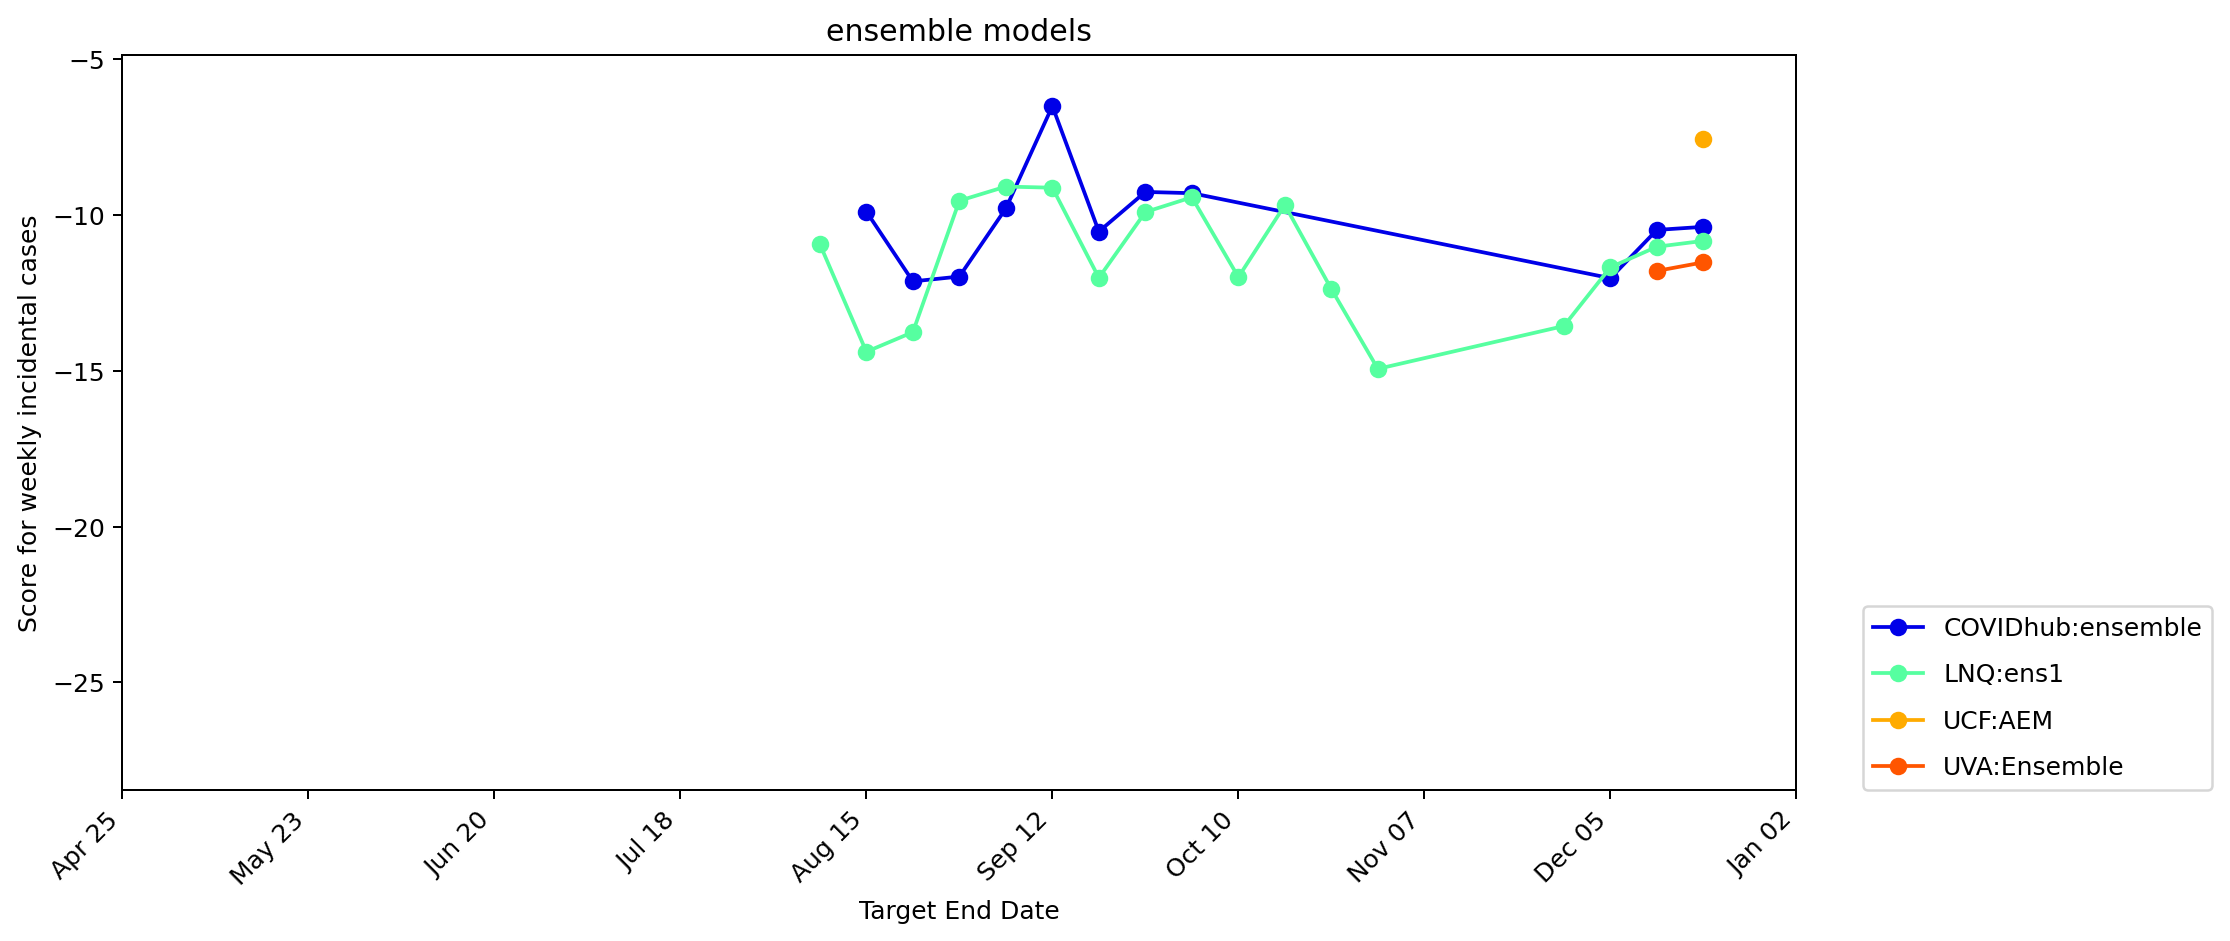

In [86]:
ScoreboardCasesX = ScoreboardCases[(ScoreboardCases.model != 'FDANIH:Sunweight') & (ScoreboardCases.model != 'FDANIH:Sweight')].copy()
S19.plotgroupsmodelweek(ScoreboardCasesX, modeltypesCases, 4, 'Case')

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


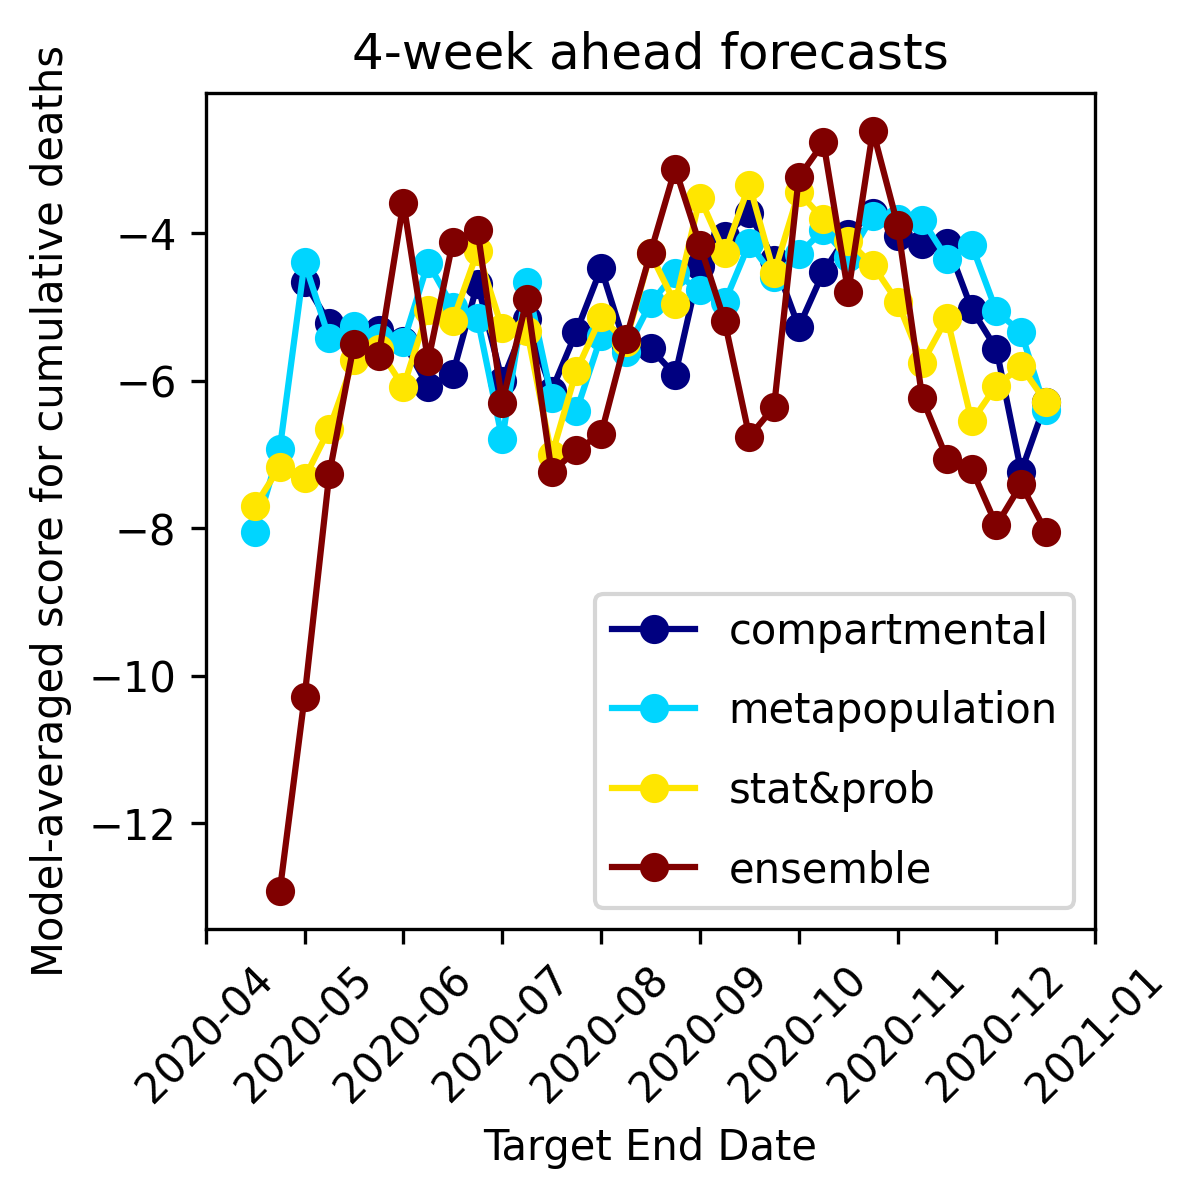

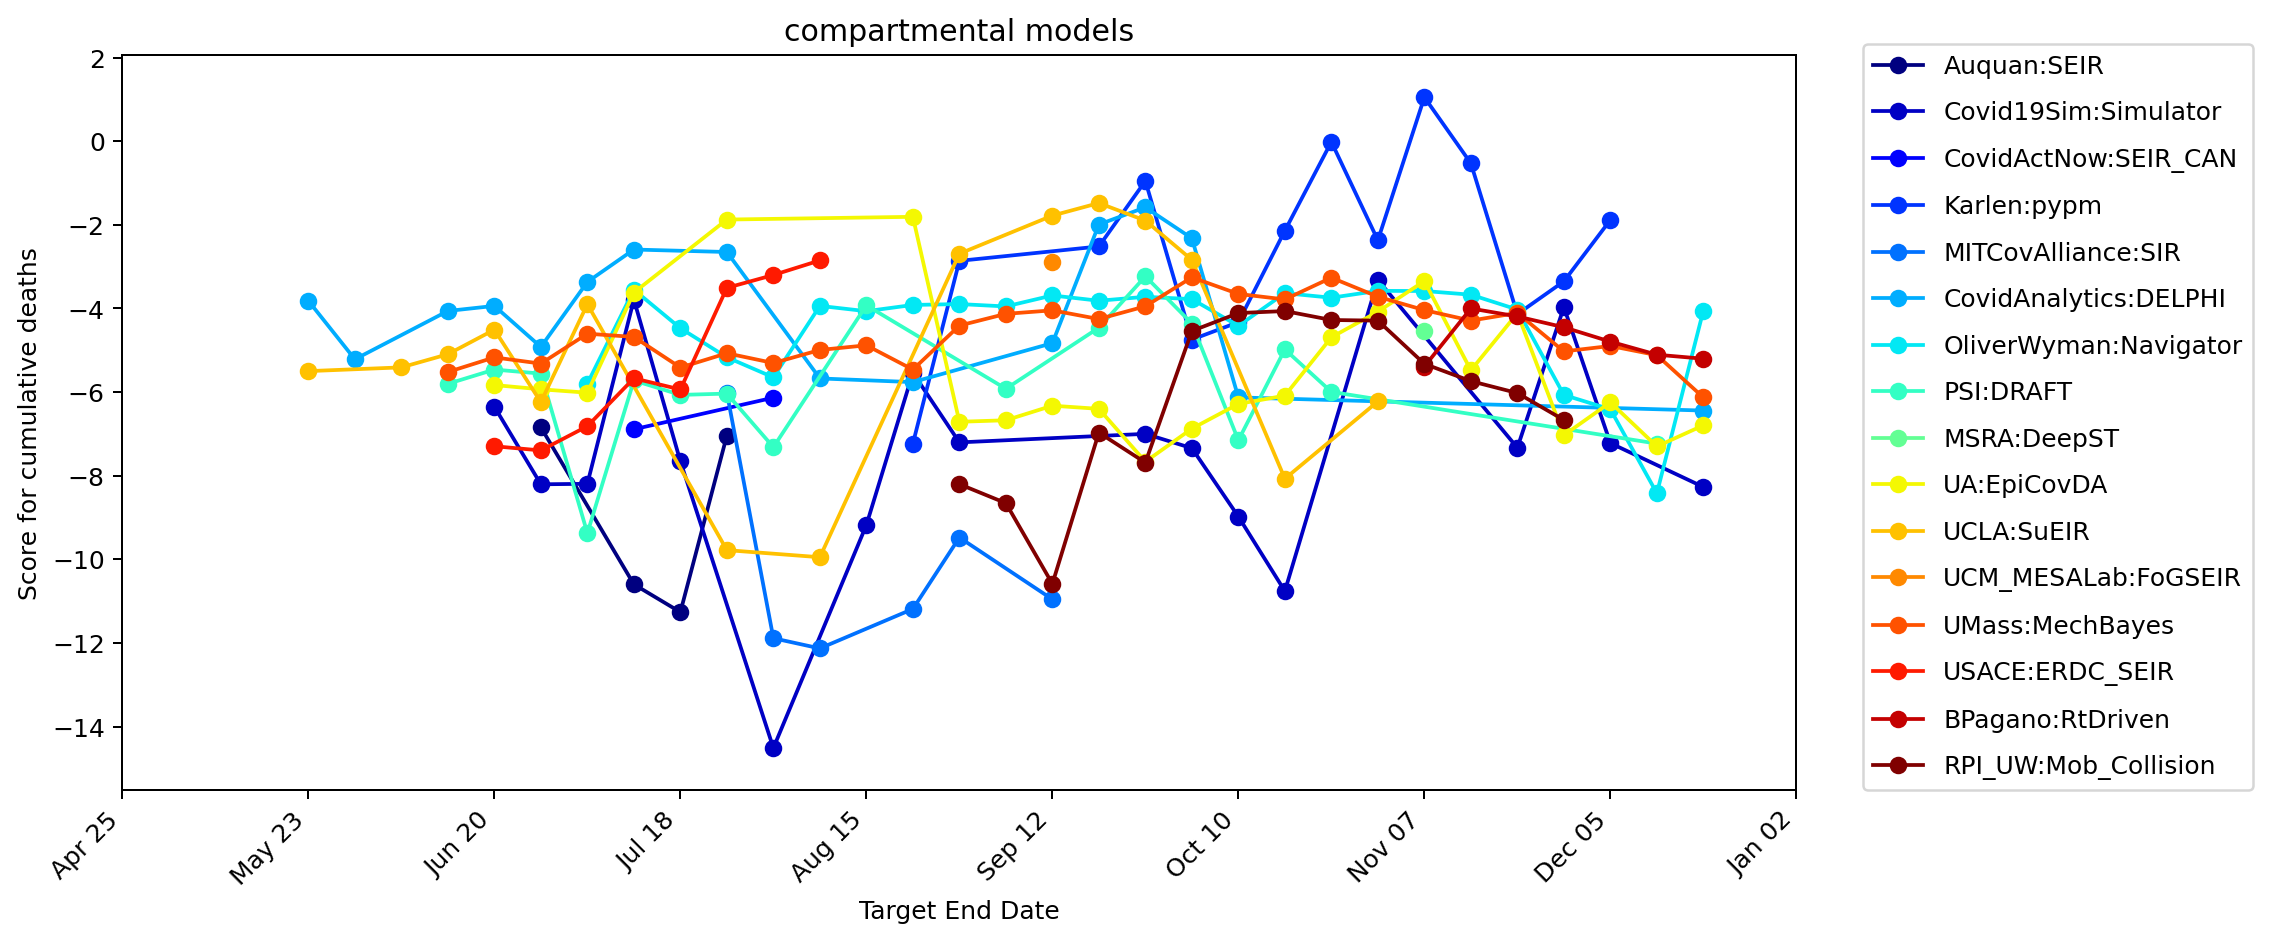

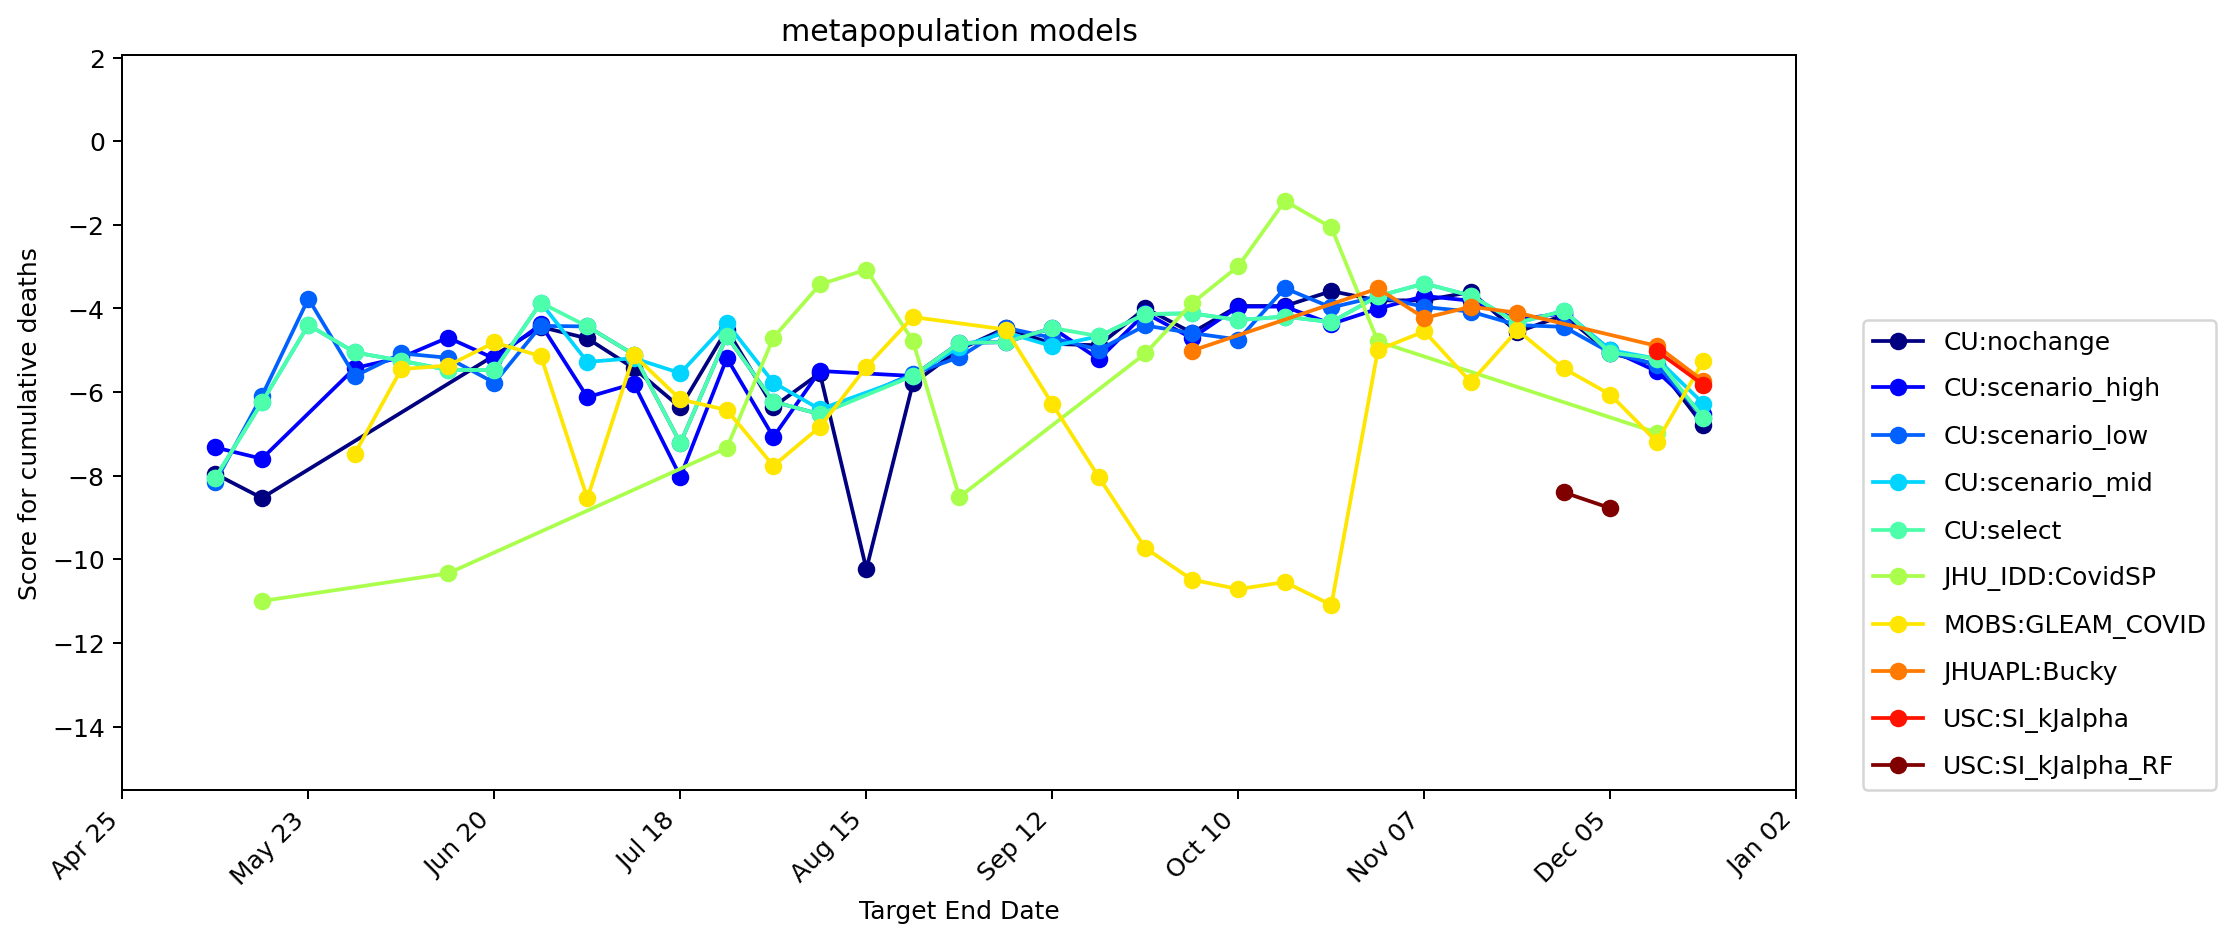

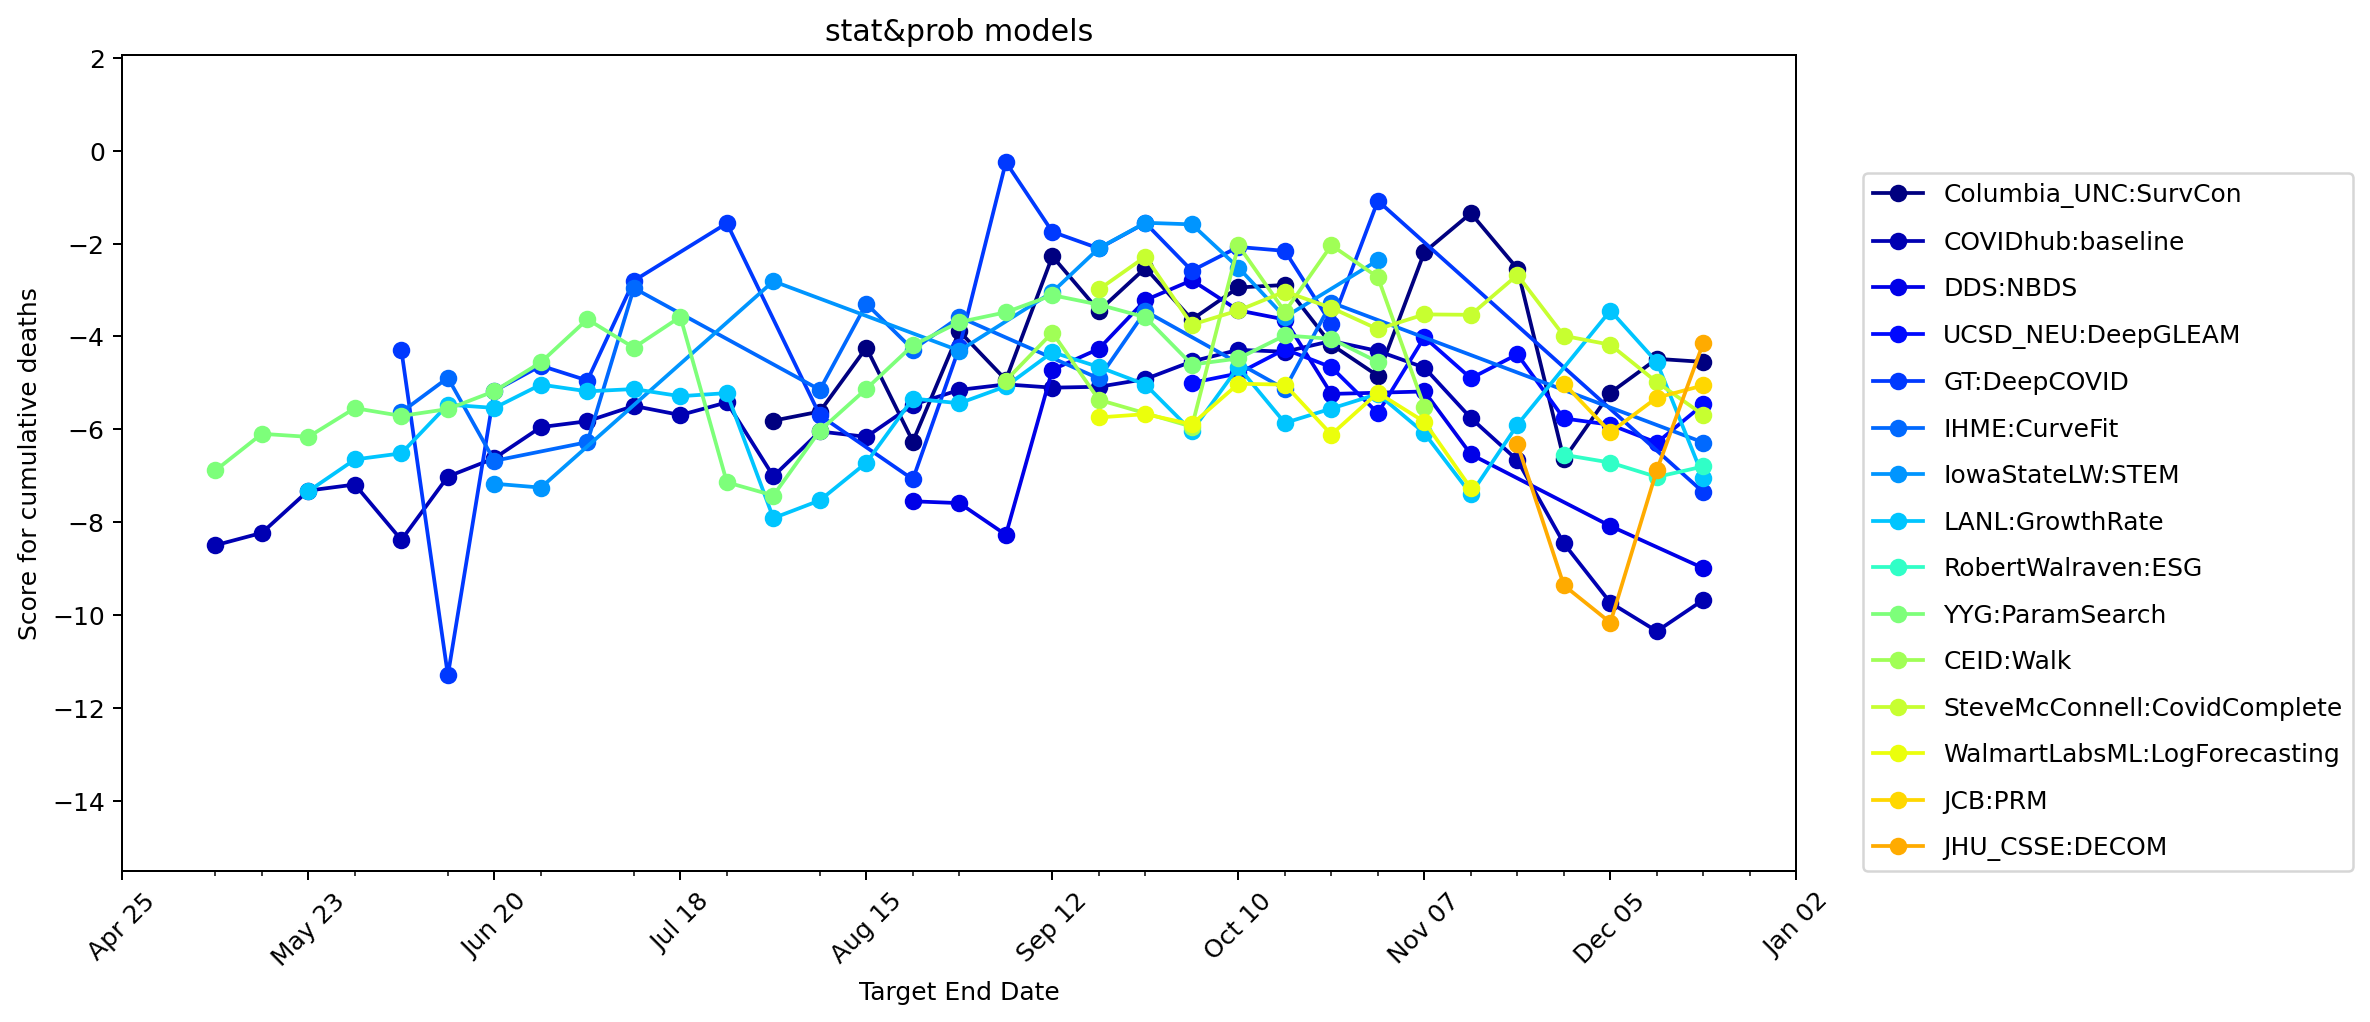

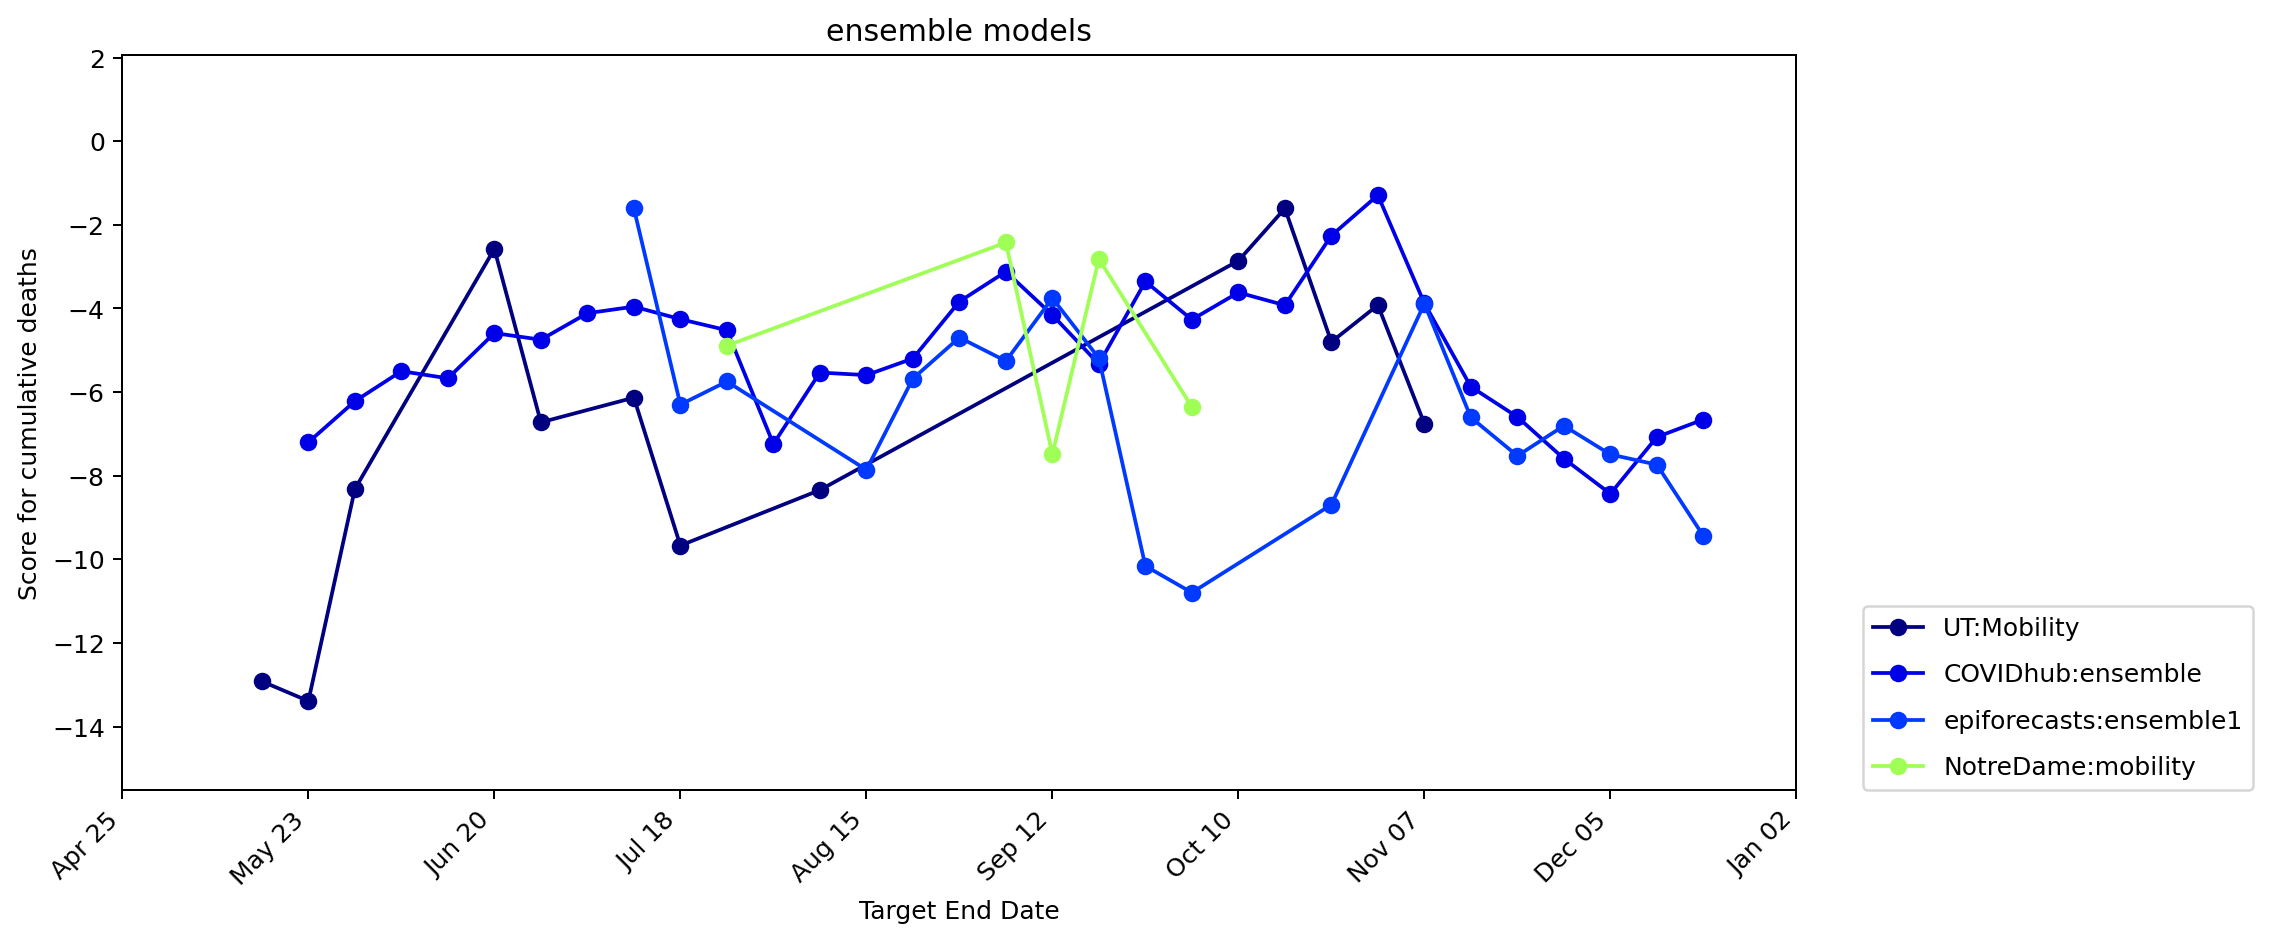

In [87]:
ScoreboardDeathsX = ScoreboardDeaths[(ScoreboardDeaths.model != 'FDANIH:Sunweight') & (ScoreboardDeaths.model != 'FDANIH:Sweight')].copy()
S19.plotgroupsmodelweek(ScoreboardDeathsX, modeltypesDeaths, 4, 'Death')

## Plots by target end date

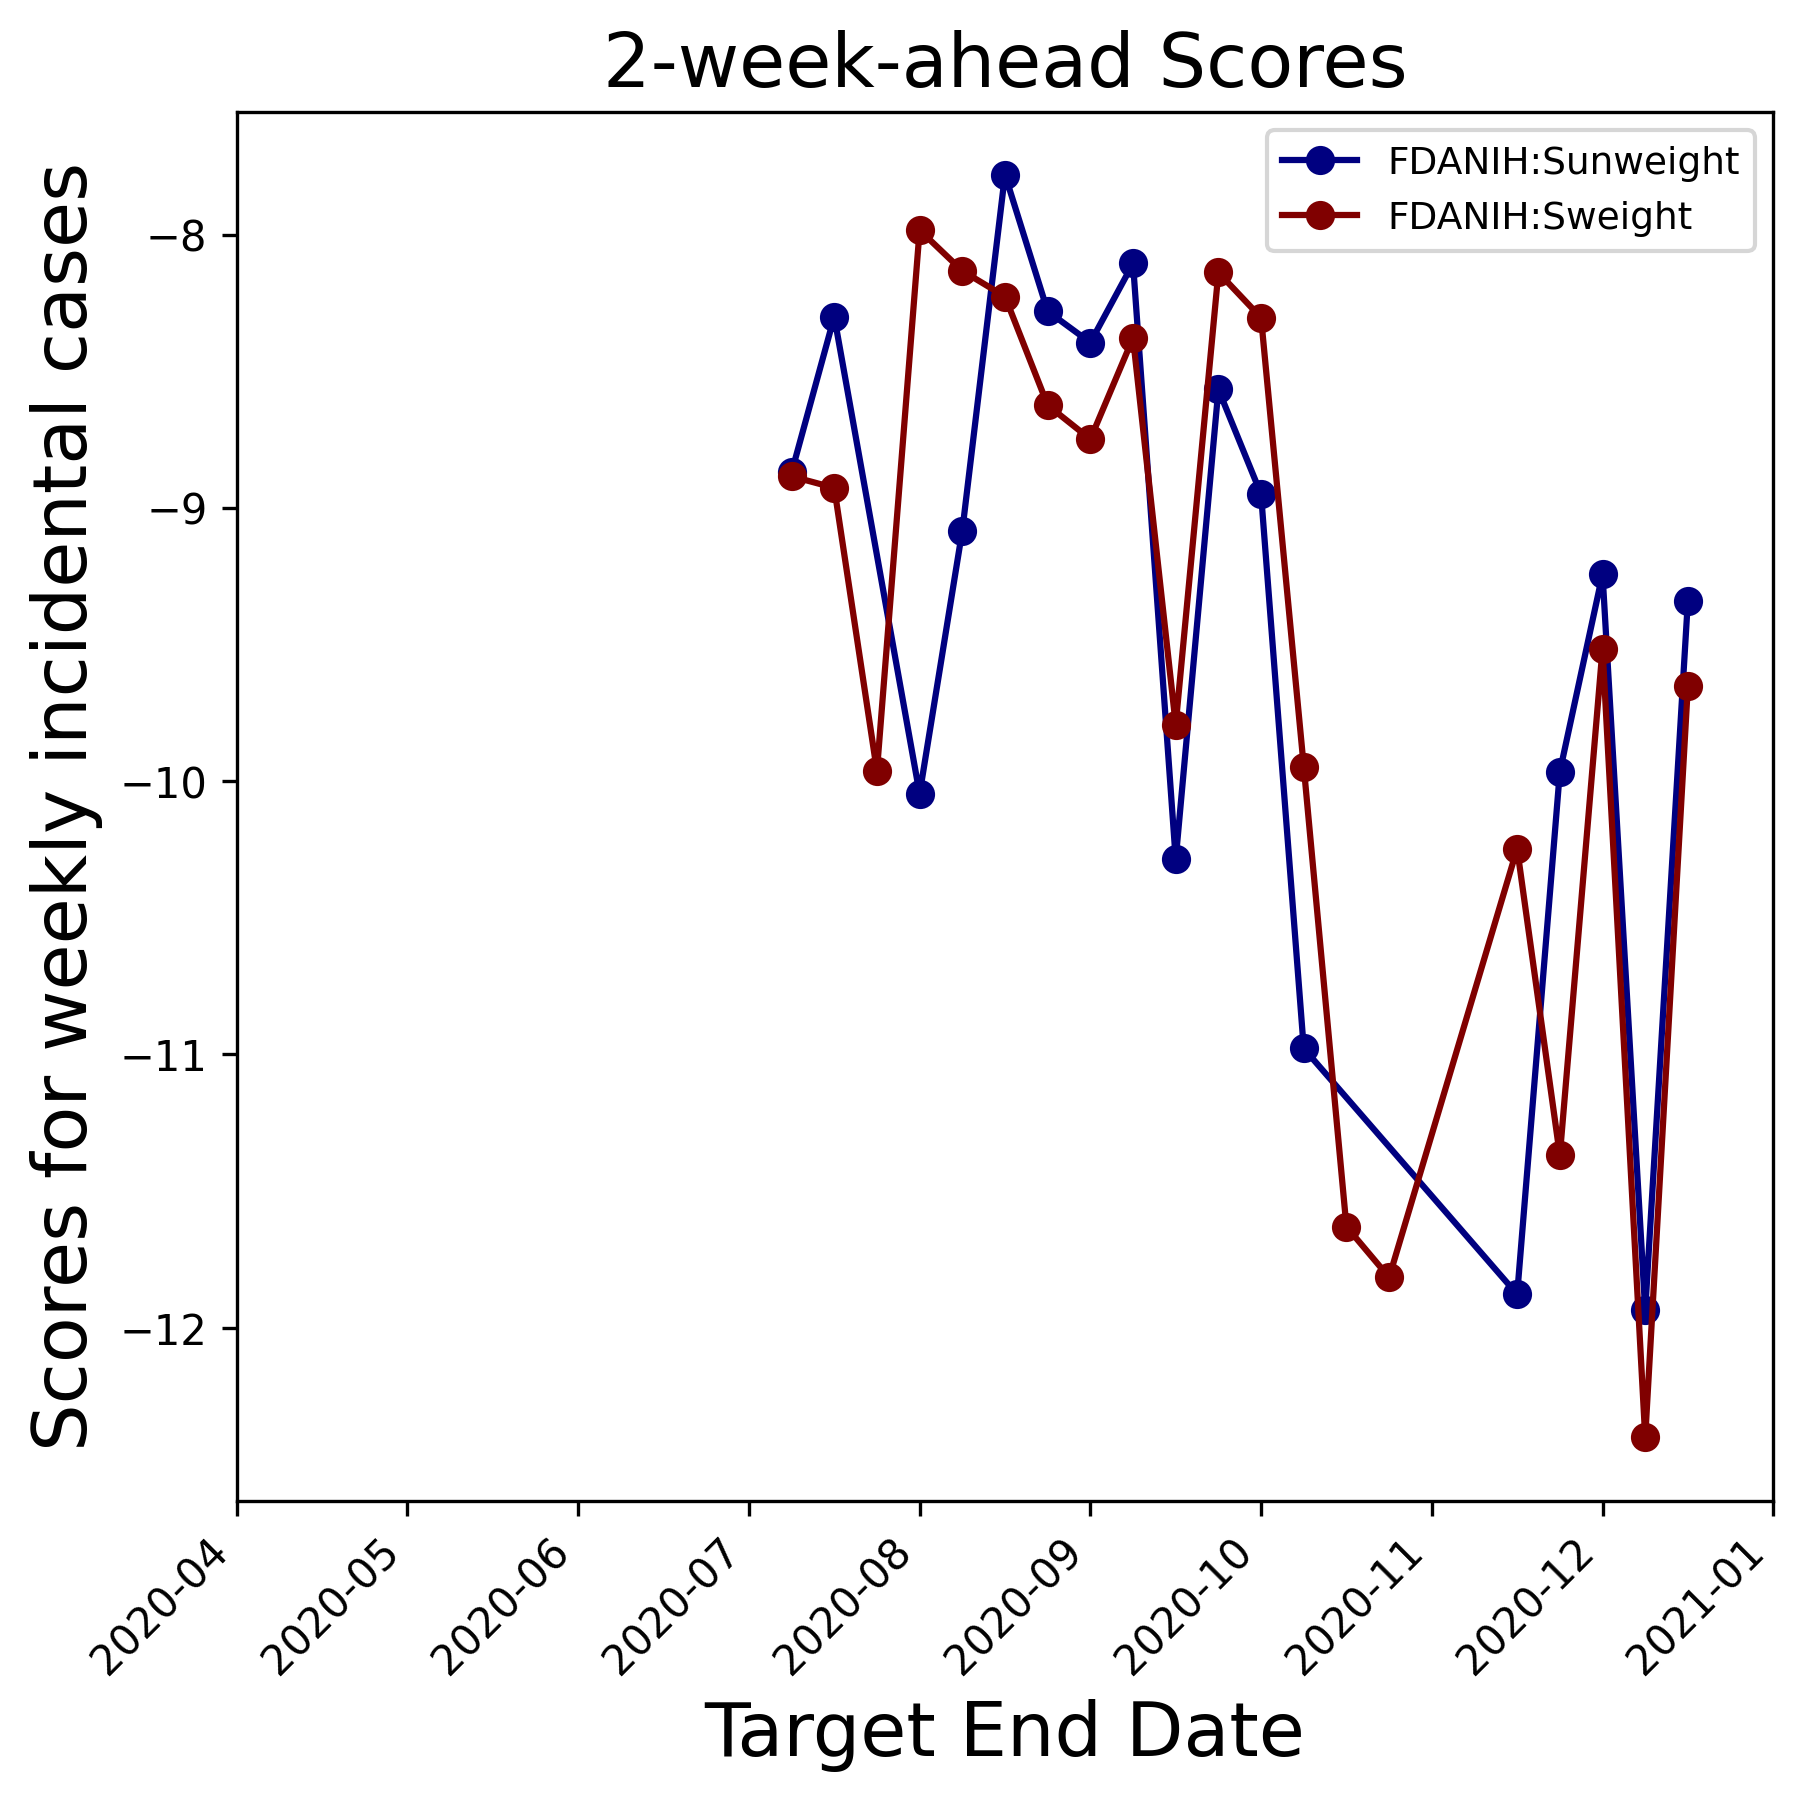

In [58]:
S19.plotTD(ScoreboardCases, 2, ['FDANIH:Sunweight','FDANIH:Sweight'])

In [59]:
#S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, 'Death')

In [60]:
#S19.plotgroupsTD(ScoreboardCases, modeltypesCases, 'Case')

# Leaderboards

In [61]:
leaderboard = pd.DataFrame(columns = ['model', 'median of past scores', 'average of past rankings', 'deltaW', 'forecasttype', 'asofdate'])

for WeeksAhead in range(1,7):
    leaderboard = S19.getleaderboard(ScoreboardDeaths,WeeksAhead,leaderboard)
    leaderboard = S19.getleaderboard(ScoreboardCases,WeeksAhead,leaderboard)
    
leaderboard.to_pickle('../Data/leaderboard.pkl')

Leaderboard for 1-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 1-week-ahead weekly incidental case forecasts  as of 2020-12-19
Leaderboard for 2-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 2-week-ahead weekly incidental case forecasts  as of 2020-12-19
Leaderboard for 3-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 3-week-ahead weekly incidental case forecasts  as of 2020-12-19
Leaderboard for 4-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 4-week-ahead weekly incidental case forecasts  as of 2020-12-19
Leaderboard for 5-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 5-week-ahead weekly incidental case forecasts  as of 2020-12-19
Leaderboard for 6-week-ahead cumulative deaths forecasts as of 2020-12-19
Leaderboard for 6-week-ahead weekly incidental case forecasts  as of 2020-12-19


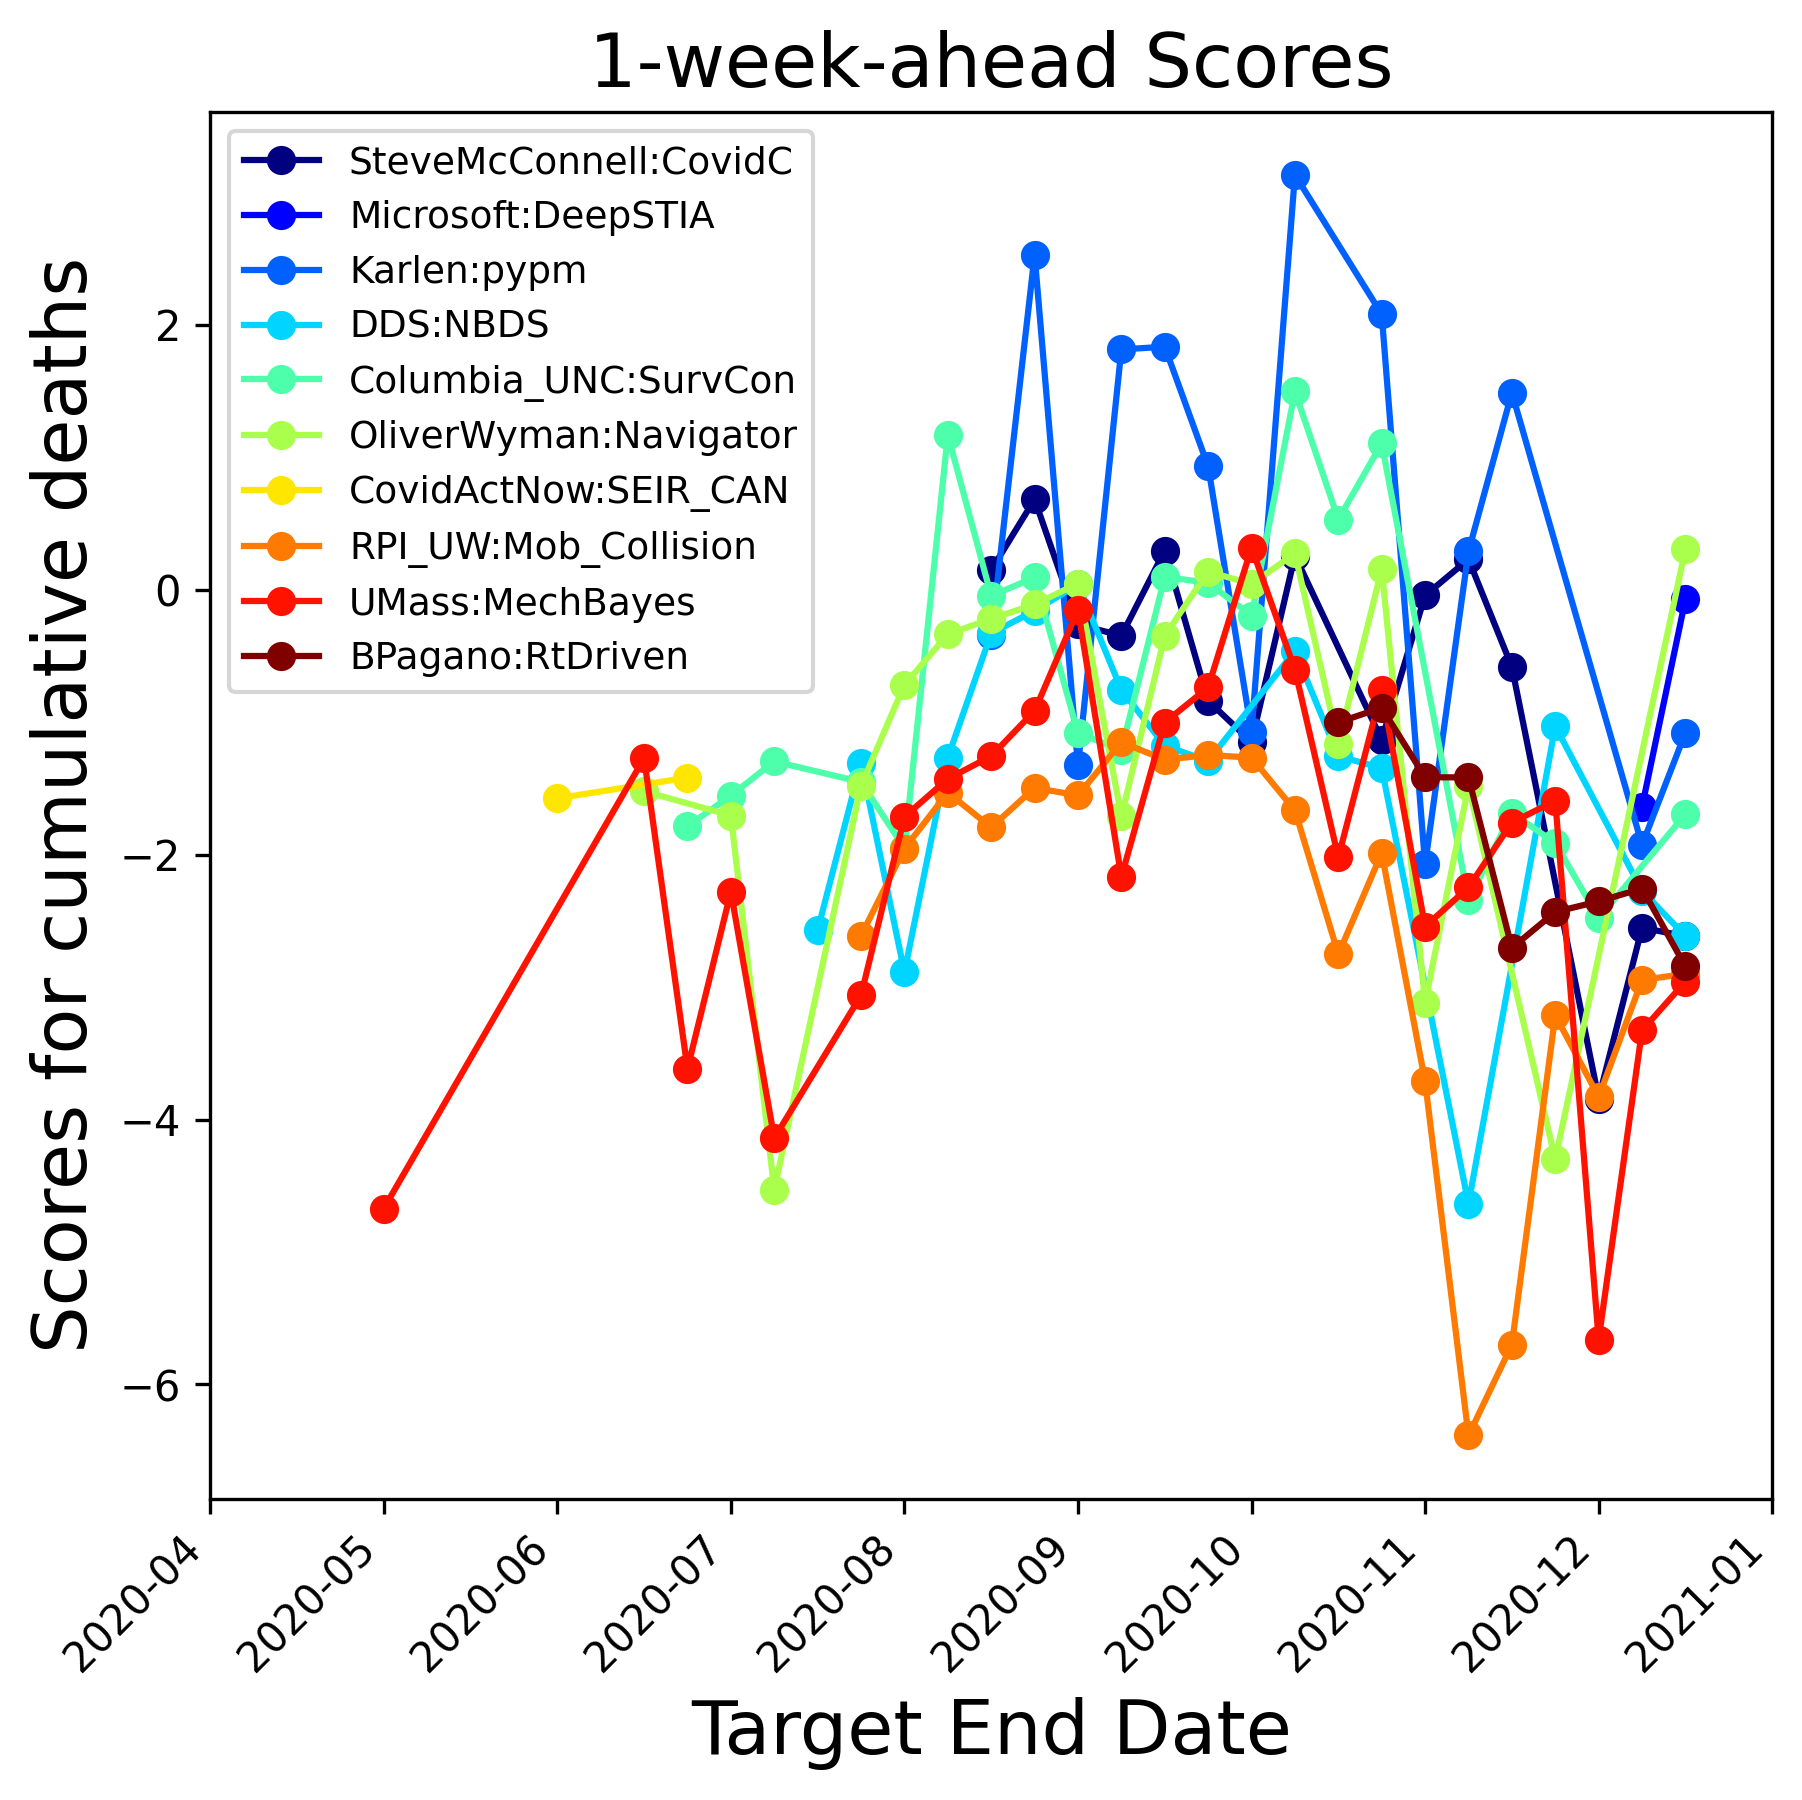

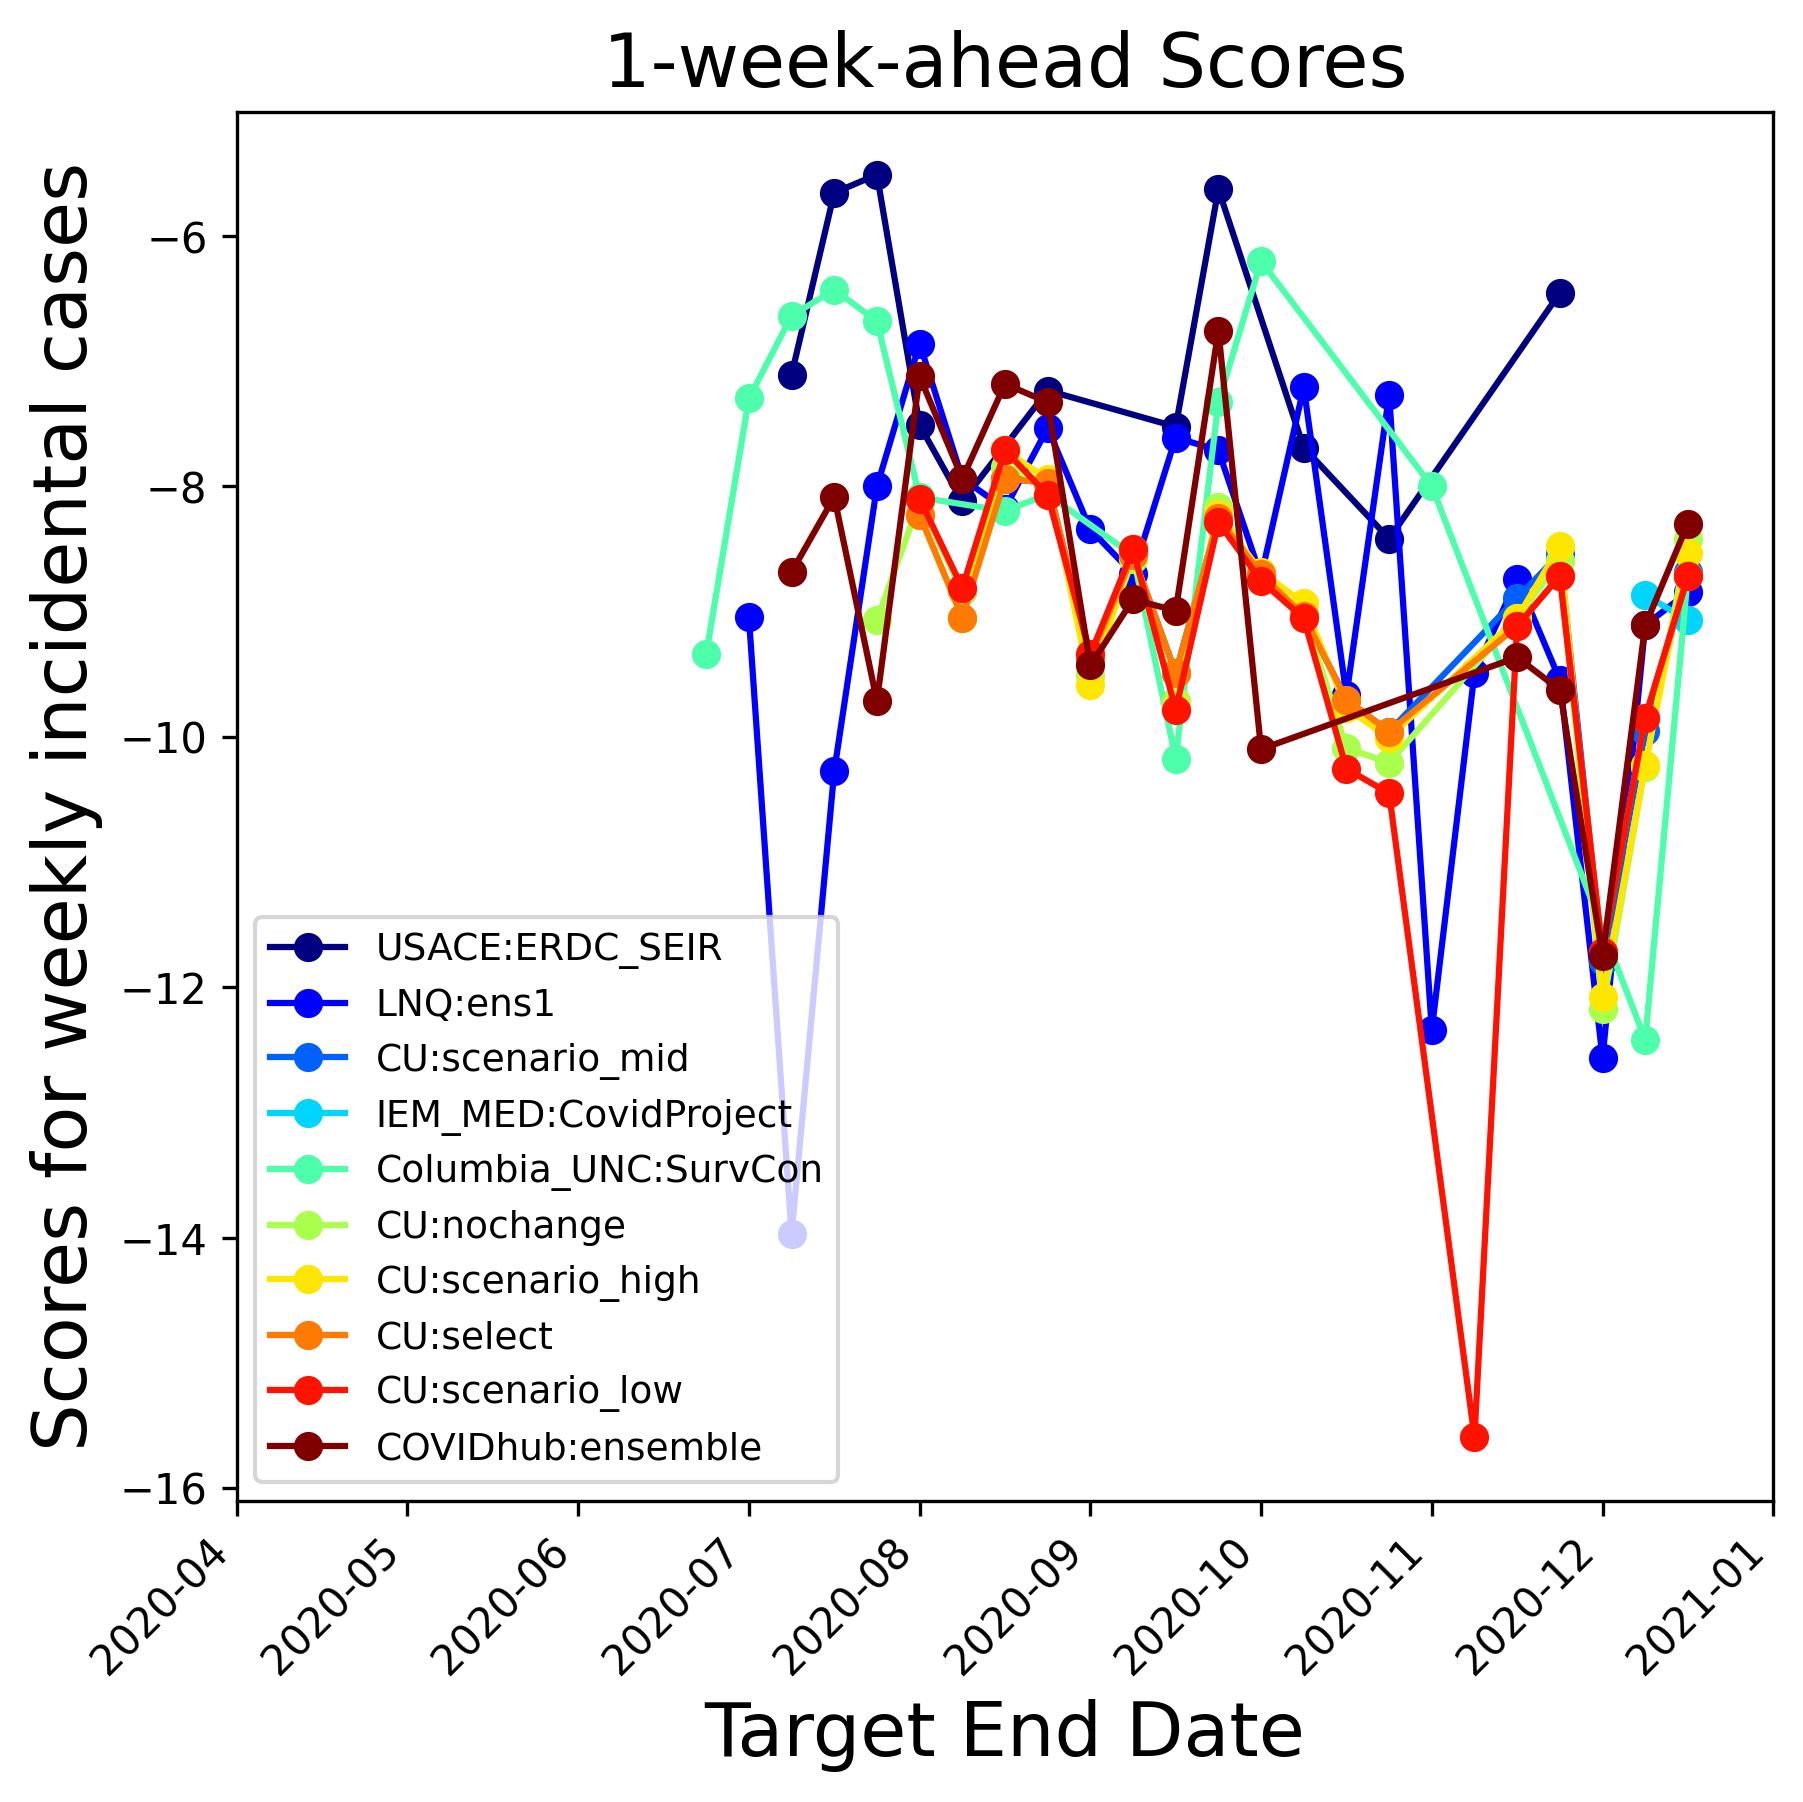

In [62]:
leaderboardcovidhub = leaderboard[(leaderboard.model != 'FDANIH:Sunweight') & (leaderboard.model != 'FDANIH:Sweight')].copy()
weeksahead = 1
maxmod = 10
leaderboardcovidhub = leaderboardcovidhub[(leaderboardcovidhub['deltaW']==weeksahead)].copy()
leaderboardcovidhub['model'] = leaderboardcovidhub['model'].str.slice(0,21)

#Deaths
mylist = leaderboardcovidhub[leaderboardcovidhub['forecasttype']=='deaths'].model.tolist()
S19.plotTD(ScoreboardDeaths, weeksahead, mylist[0:maxmod])

#Cases
mylist = leaderboardcovidhub[leaderboardcovidhub['forecasttype']=='cases'].model.tolist()
S19.plotTD(ScoreboardCases, weeksahead, mylist[0:maxmod])

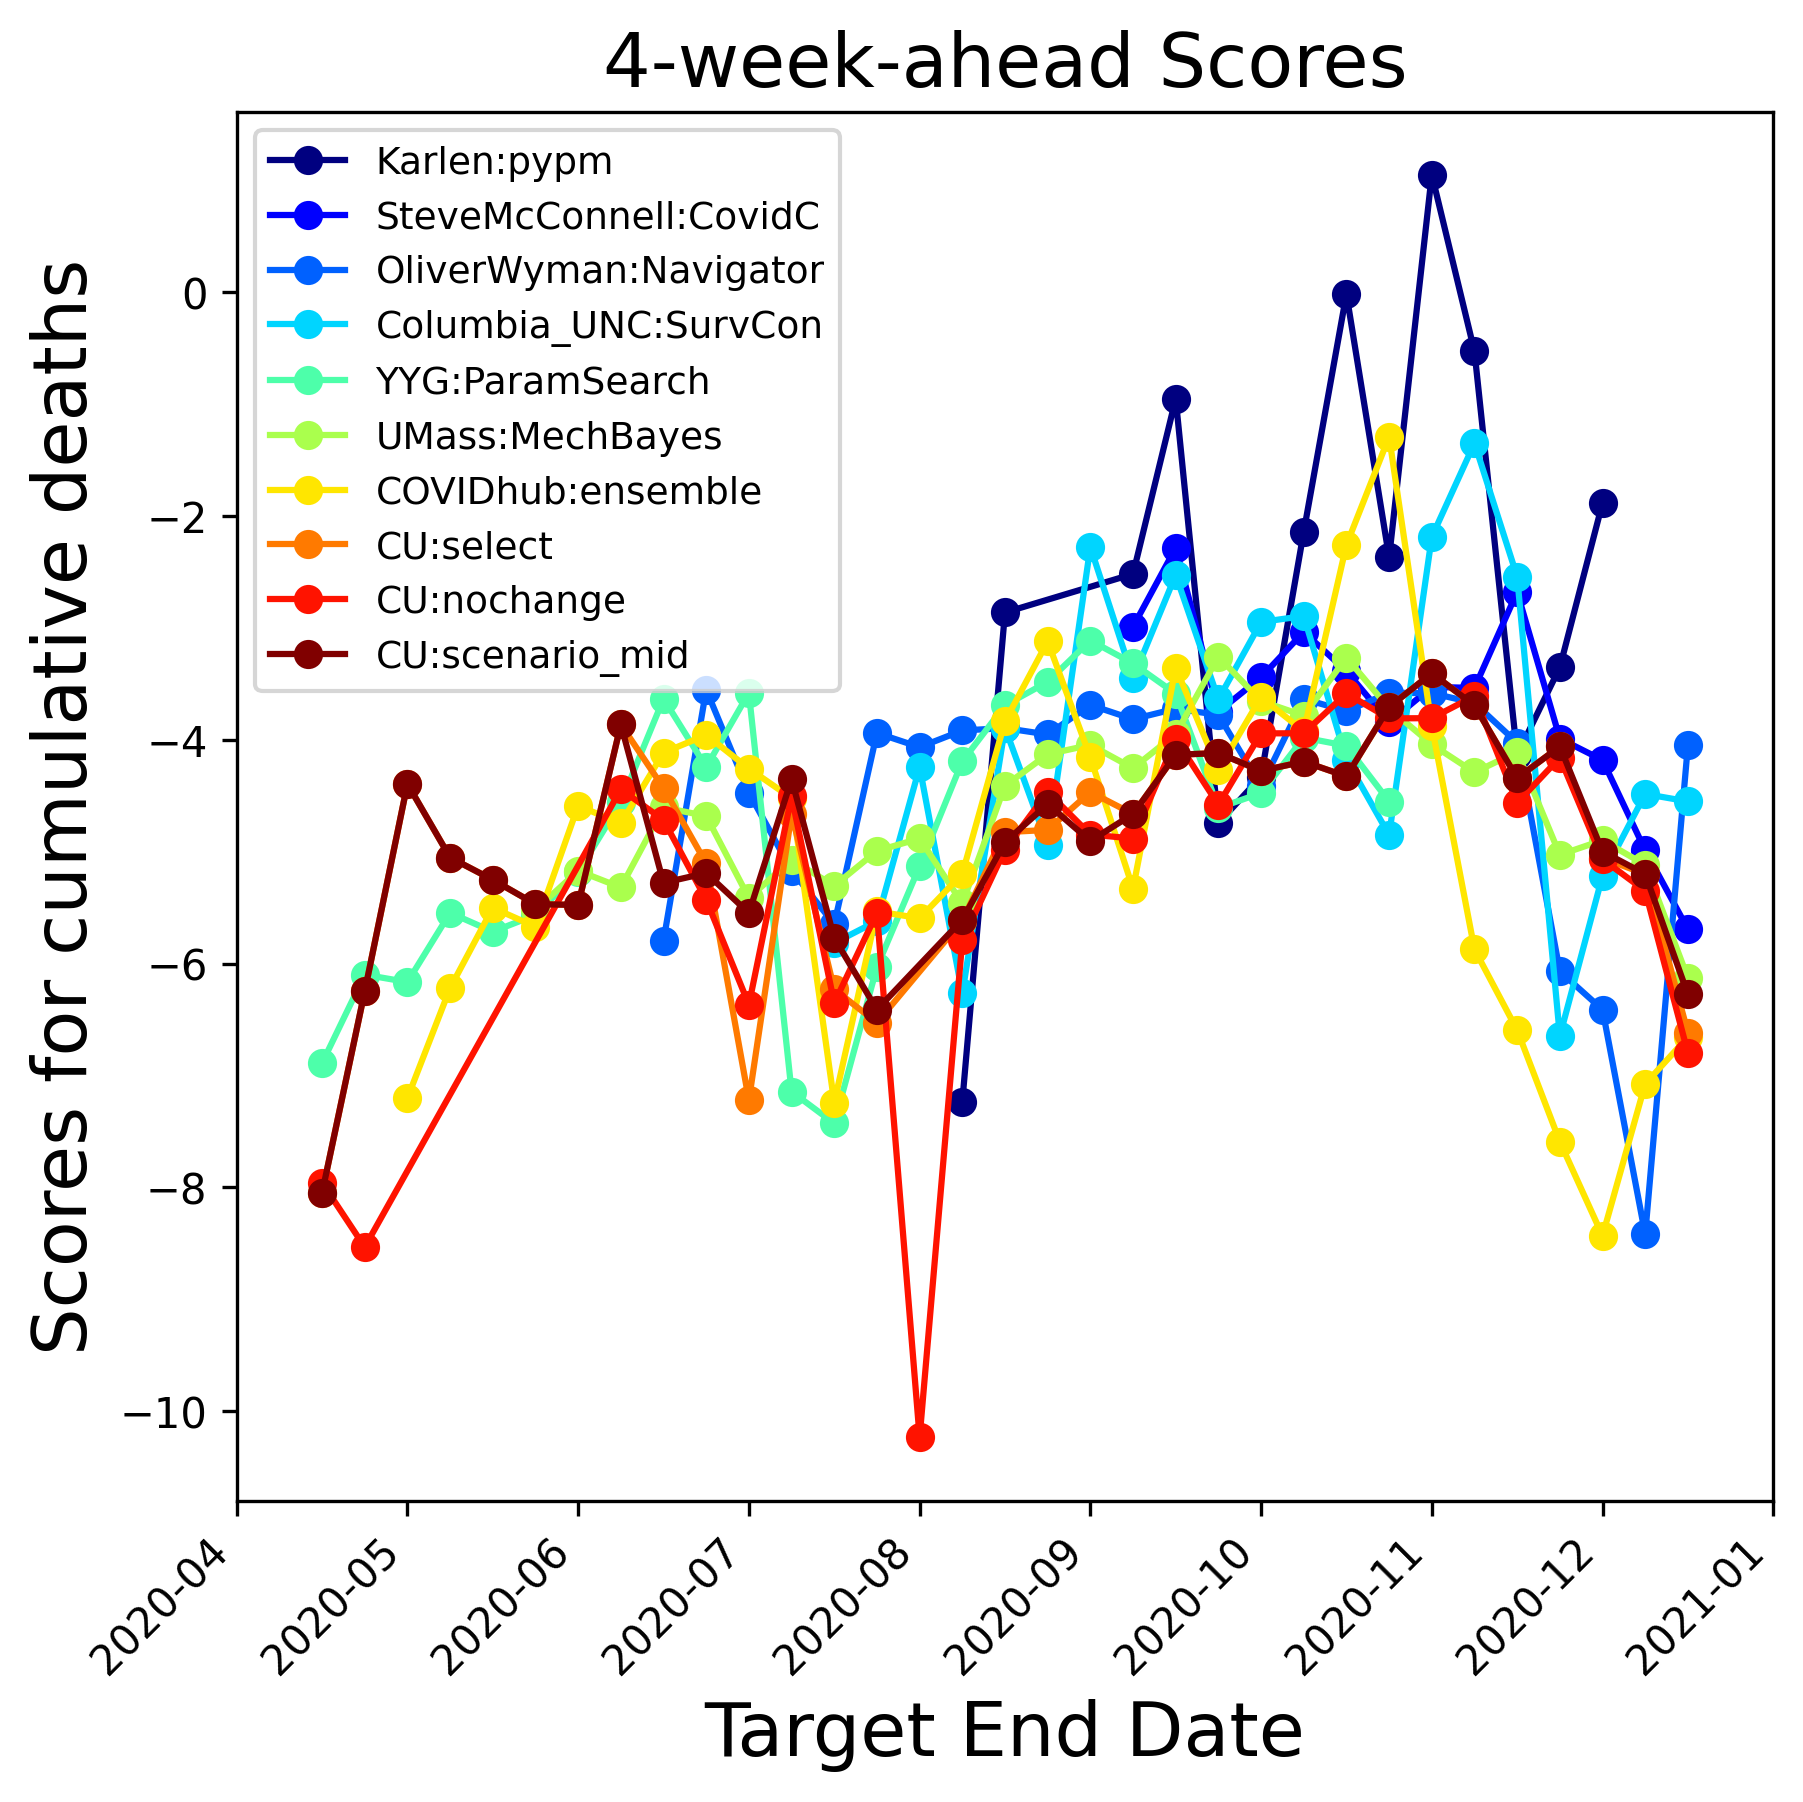

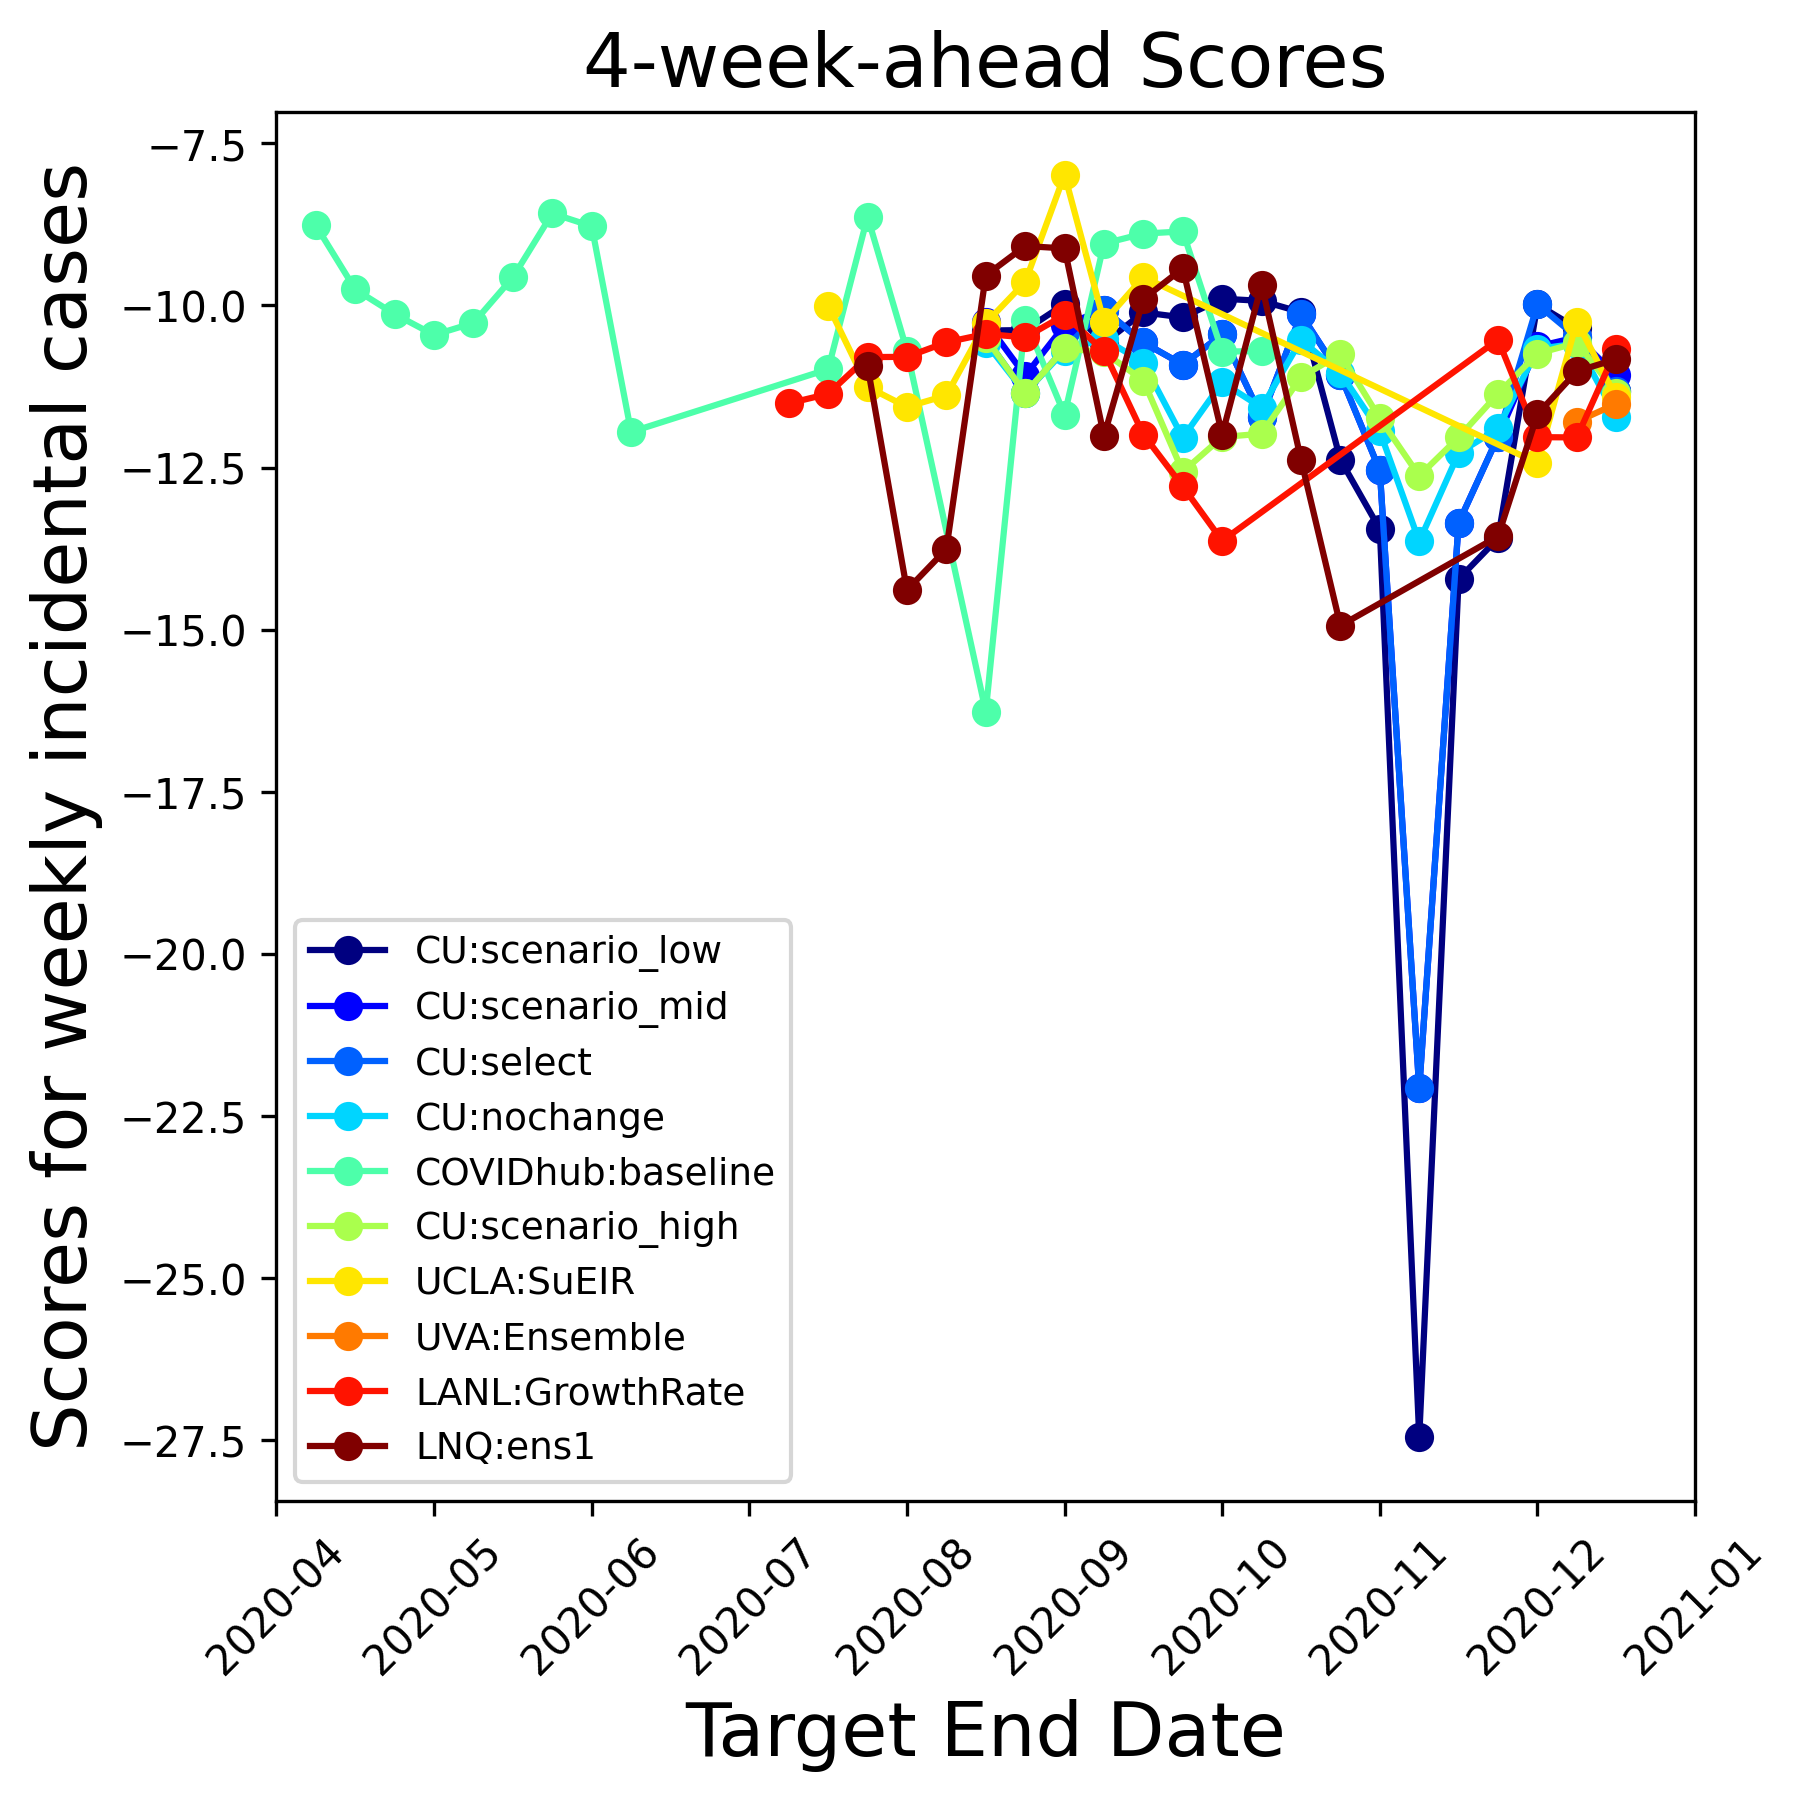

In [63]:
leaderboardcovidhub = leaderboard[(leaderboard.model != 'FDANIH:Sunweight') & (leaderboard.model != 'FDANIH:Sweight')].copy()
weeksahead = 4
maxmod = 10
leaderboardcovidhub = leaderboardcovidhub[(leaderboardcovidhub['deltaW']==weeksahead)].copy()
leaderboardcovidhub['model'] = leaderboardcovidhub['model'].str.slice(0,21)

#Deaths
mylist = leaderboardcovidhub[leaderboardcovidhub['forecasttype']=='deaths'].model.tolist()
S19.plotTD(ScoreboardDeaths, weeksahead, mylist[0:maxmod])

#Cases
mylist = leaderboardcovidhub[leaderboardcovidhub['forecasttype']=='cases'].model.tolist()
S19.plotTD(ScoreboardCases, weeksahead, mylist[0:maxmod])

### ADD TO GITHUB

In [88]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])

[master 909e263] “Update”
 80 files changed, 43307 insertions(+), 54880 deletions(-)
 rewrite Data/ModelsANDForecasts.pkl (63%)
 rewrite Data/ScoreboardCases.pkl (68%)
 rewrite Data/leaderboard.pkl (78%)
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_CompartmentalEPI-MetaPopmodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_CompartmentalEPImodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_Ensemblemodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_Phenomenologicalmodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_Stats&MLmodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_compartmentalmodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_ensemblemodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_metapopulationmodels.png
 delete mode 100644 Figures/CUMDEATH_Average_Forward_Scores_stat&probmodels.png
 delete mode 100644 Figures/CUMDEATH_Scor